<hr style="height:5px;border-width:0;color:orange;background-color:orange">
    <center> <span style="font-size: 38px;"> Microsoft Malware Prediction </span> </center>

+ Author: **Alejandro Sánchez Silvestre**
+ Date: **February 2024**
+ Module: **Machine Learning: Classifier**

<hr style="height:5px;border-width:0;color:orange;background-color:orange">


# Intro
El conjunto de datos se ha obtenido mediante el muestreo y la adaptación del original del concurso de
Kaggle Microsoft Malware Prediction. Cada fila del dataset corresponde a una única máquina,
identificada por el campo MachineIdentifier. El target es la variable **HasDetections**, que indica si se ha
detectado la infección de la máquina por el malware.

Los datos pueden descargarse en el siguiente enlace: 
https://drive.google.com/file/d/1ikHxdS6cEUvVBJHWMFdgJHBS9bebEOxs/view?usp=sharing



OBJETIVO

Desarrollar un proyecto de modelización supervisada para predecir la probabilidad de infección de un
ordenador con Windows. 

**ROAD MAP Y OUTLINE**: 
- **Intro**
- **Pipeline summary**: 
    1. **Comprensión del problema/negocio**
    2. **Entendimiento de los datos**: EDA uni y bivariante
    3. **Preprocesamiento**
    4. **Modelización**: Baseline
    5. **First Iteration**: XGBoost con 7 features importantes + target
    6. **Second Iteration**: Lista de 3 modelos (Random Forest, Gradient Boosting y XGBoost) con 7 features + target.
    7. **Third Iteration**: XGBoost optimizado con hiperparametros  y entrenado con datos ampliados (20 col + target)
- **Conclusion**





<hr style="height:5px;border-width:0;color:orange;background-color:orange">


# **PIPELINE SUMMARY**

Resumen sacado de ppts a modo de roadmap original. 

1. **COMPRENSION DEL NEGOCIO**
Compresion del problema a resolver, la clase que se precide y las variables del problema.



2. **ENTENDIMIENTO DE LOS DATOS**
Identificacion de las fuentes de informacion, descripción y analisis de los datos. Esta etapa comprende:

    2.1 ANALISIS UNIVARIANTE DE LOS DATOS:Deberemos hacer un EDA pasando por los siguientes pasos
    - Tamaño del Dataset
    - Informacion basica del Dataset: exploracion columnas, filas, tipos de datos...modificar tipos de datos si necesario
    - Analisis estadistico descriptivo de las variables
    - Identificacion de Nulos y posterior tratamiento
    - Identificacion de Duplicados
    - Busqueda de Outliers y decision de tratamiento sobre estos (atipicos naturales o errores)
    - Correlacion de las variables con la variable target(variable: HasDetections, significa si se ha detectado la infeccion)
    - Visualizacion grafica de las distribuciones 

    2.2 ANALISIS MULTIVARIANTE:
    - Distribucion de variantes de 2 a 2
    - Correlacion de las variantes de 2 a 2
    - Cross-tabs
    - Correlacion de combinaciones de variante con la clase




3. **PREPARACION DE LOS DATOS**

    3.1 LIMPIEZA DE ATRIBUTOS:
    - Ajuste de tipos.
    - Imputacion de valores nulos (0, media, mediana, moda, otro valor...)
    - Correlacion de valores atipicos o eliminacion atipicos
    - eliminacion de atributos de baja varianza o elevada correlacion con otros


    3.2 TRANSFORMACION DE ATRIBUTOS
    - *Variables CATEGORICAS*: One-Hot-Enconding, Label-encoding, agrupacion de valores...
    - *Variables NUMERICAS*: Escalado(min-max,Standarization..), Categorizacion de variables numericas, Redondeo
    - *Variables de FECHA*: Conversion a tiempo, Agregacion, Diferencias...
    - *Variable de TEXTO*: Normalizacion de textos, vectorizacion de textos, word embedings

    3.3 GENERACION DE ATRIBUTOS:
    - Feature engeniering: destilacion de nuevas variabels utiles a partir de datos exisitentes
    - Añade una variable aleatoria al modelo

    3.4 SELECCION DE LOS DATOS
    - Muestreo de los registros
    - Seleccion de atributos/Reduccion de dismensionalidad


4. **MODELIZACION**
Etapa donde **seleccionaremos el modelo** en función del problema a resolver entre los distintos modelos disponibles.

    4.1 PARTICION Y MUESTREO DEL DATASET
    - Definicion de estrategia de **validación** (Random Holdout, K-fold, Bootstrap... )
    - Definicion de politica de **partición** (aleatorio o guiado)
    - Definición de estrategias de remuestreo (mantener siempre validación intacta)
    - Definición de la **metrica de evaluacion**(solo una metrica)

    4.2 EVALUACION DE ALGORITMOS
    - Definicion del modelo base (Keep-it-simple)
    - Short-list de algoritmos de distintos tipos

    4.3 OPTIMIZACION DE MODELOS
    - Hyperparamether tunning
    - Algoritmos de Ensemble


5. **EVALUACION DEL MODELO**
Seleccion de la metrica de evaluacion, estrategia de evaluacion y evaluacion de la importancia de las metricas

    5.1 SELECCION DEL MODELO/EVALUACION:
    - Seleccion del modelo con mejor metrica en test
    - Comprobación del rendimiento en validación(Capacidad de generalizacion)

    5.2 RECALIBRADO
    En caso de que sea necesario recalibrar los scorings para obtener la probabilidad real.





<a id='seccion2'></a>
## 1. Comprension del Problema/Negocio
<hr style="height:5px;border-width:0;color:orange;background-color:orange">

El dataset contienen información sobre las caracteristicas de distintos ordenadores (MachineIdentifier) así como si ha sido infectado o no por malware (HasDetections)

Evaluaremos:
-	Columnas dataset: siginificado de cada una
-	Definir hipótesis previa
-	Algoritmo ML a utilizar para resolver problema

# BIBLIOTECAS

In [1]:
# Importamos las bibliotecas necesarias
# Generales
import pandas as pd
import numpy as np

# Visualización y EDA
import matplotlib.pyplot as plt
import seaborn as sns  
import plotly.express as px
import skimpy as sk



# importamos los distintos modelos a utilizar
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# y las metricas a utilizar ya las importamos antes...

# dividimos train test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


import random

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


from sklearn.model_selection import RepeatedKFold, cross_validate

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay



In [2]:
df= pd.read_csv('sample_mmp.csv',encoding='UTF-8',sep=',',index_col=0).reset_index(drop=True)
df
# Atencion nos informa que en columnas 29 y 42 tenemos datos mixtos...transformaremos los datos acorde a las columnas.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5704\2103149277.py:1: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('sample_mmp.csv',encoding='UTF-8',sep=',',index_col=0).reset_index(drop=True)


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,53447.0,...,19951.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,53447.0,...,48753.0,0,0.0,0.0,0,0,0.0,1.0,3.0,0
2,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,46781.0,...,33111.0,1,0.0,0.0,1,1,0.0,0.0,15.0,0
3,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,53447.0,...,48473.0,1,NaN,0.0,0,0,0.0,0.0,15.0,1
4,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0,0,NaN,47238.0,...,4343.0,1,NaN,0.0,1,0,0.0,1.0,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,a739cacc292f3f1e745827c1ca6c6ada,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1090.0,0,7.0,0,NaN,53447.0,...,33088.0,1,0.0,0.0,1,0,0.0,1.0,10.0,0
499996,a4c232d528d98343e8f1b73650da7b82,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1620.0,0,7.0,0,NaN,53447.0,...,NaN,0,NaN,0.0,0,0,0.0,0.0,15.0,0
499997,fd16cd542d660848d272e4552bcccb1e,win8defender,1.1.15300.5,4.13.17134.112,1.275.1343.0,0,7.0,0,NaN,53447.0,...,41727.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
499998,fa0841f8f6147de7c3d287e05270ed42,win8defender,1.1.15100.1,4.14.17639.18041,1.273.483.0,0,7.0,0,NaN,43856.0,...,11947.0,0,NaN,0.0,0,0,0.0,0.0,1.0,0


In [3]:
# Identificamos las columas que tienen tipos mixtos para dejarlas como un solo tipo.

print('Columnas tipos mixtos: ',df.columns[29],' y ',df.columns[42])

Columnas tipos mixtos:  SMode  y  Census_PrimaryDiskTotalCapacity


In [4]:
df.SMode.describe()

count    470152.000000
mean          0.000438
std           0.020928
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SMode, dtype: float64

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# cambiamos la opcion para que no muestre la notacion cientifica.

df.Census_PrimaryDiskTotalCapacity.describe()

count     497024.00
mean      514043.32
std       370446.82
min        10240.00
25%       239372.00
50%       476940.00
75%       953869.00
max     47687668.00
Name: Census_PrimaryDiskTotalCapacity, dtype: float64

In [6]:
# Convertimos columna SMode a tipo float(variable binaria)
df.SMode= df.SMode.astype(float)
# y lo mismo hacemos con la otra columna, nos aseguramos que lo pasamos a tipo float. En este caso es una variable numerica continua.
df.Census_PrimaryDiskTotalCapacity = df.Census_PrimaryDiskTotalCapacity.astype(float)

In [7]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.00,0,NaN,53447.00,...,19951.00,0,NaN,0.00,0,0,0.00,0.00,11.00,1
1,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.00,0,NaN,53447.00,...,48753.00,0,0.00,0.00,0,0,0.00,1.00,3.00,0
2,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.00,0,NaN,46781.00,...,33111.00,1,0.00,0.00,1,1,0.00,0.00,15.00,0
3,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.00,0,NaN,53447.00,...,48473.00,1,NaN,0.00,0,0,0.00,0.00,15.00,1
4,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.00,0,NaN,47238.00,...,4343.00,1,NaN,0.00,1,0,0.00,1.00,13.00,1


In [8]:
df.columns

# tenemos la tira de columnas y no sabemos qué significa cada una. Buscaremos informacion en Kaggle sobre este aspecto para ver si podemos enterarnos un poco mas a fin de identificar 
# qué columnas son de importancia y cuales no a fin de reducir las columnas(82 son demasiadas  para introducir en nuestro modelo ML)

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

### Detalle Significado Columna

Siguiendo el esquema inicial, indagamos sobre la informacion que contienen cada una de las 82 columnas:

Resumiendo, las columnas parecen se referirse tanto a datos de software como hardware de las distintas maquinas así como localizacion, uso o compañía.

_Primera hipotesis_ que me sugieren la info:

Basandonos en un ligero conocimiento sobre malware hipotizamos que los datos sobre el sistema antivirus, el sistema operativo, el buscador usado para internet, la localizacion de la maquina(pais, region) y pertenencia a una compañia si existe un firewall y otros tipos…podrian tener implicacion en la infeccion de malware

Poniendonos en la piel de un Hacker interesaría hackear maquinas de **lugares ricos** (compañías de gran facturación, paises desarrollados..) donde fuera  lo mas facil posible (caracteristicas del **software** de la maquina como OS, si tiene antivirus, buscador...) obtener datos, hackear y o bien pedir dinero a la compañía por evitar un mal mayor. Sin embargo a un hacker poco le importa si la maquina tiene un disco duro de disco CD/DVD (Census_HasOpticalDiskDrive) o el numero de nucleos logicos del procesador( Census_ProcessorCoreCount)... es decir la mayoria de caracteristicas de **hardware** a priori no las consideraría claves.


A través de Kaggle (https://www.kaggle.com/c/microsoft-malware-prediction/data) hemos conseguido la información de cada columna. Extraeremos las variables que nos parecen sospechosas sin antes ver datos por hacer una exploración

- MachineIdentifier - Individual machine ID
- **ProductName** - Defender state information e.g. win8defender
- **EngineVersion** - Defender state information e.g. 1.1.12603.0
- **AppVersion** - Defender state information e.g. 4.9.10586.0
- **AvSigVersion** - Defender state information e.g. 1.217.1014.0
- **DefaultBrowsersIdentifier** - ID for the machine's default browser
- **AVProductStatesIdentifier** - ID for the specific configuration of a user's antivirus software
- **HasTpm** - True if machine has tpm
- **CountryIdentifier** - ID for the country the machine is located in
- **OrganizationIdentifier** - ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries
- **OsVer** - Version of the current operating system
- **OsPlatformSubRelease** - Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)
- **IsProtected** - This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected.
- **Firewall** - This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.
- **UacLuaenable** - This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA.
- **Census_OSArchitecture** - Architecture on which the OS is based. Derived from OSVersionFull. Example - amd64
- **Census_OSSkuName** - OS edition friendly name (currently Windows only)
- **Census_OSWUAutoUpdateOptionsName** - Friendly name of the WindowsUpdate auto-update settings on the machine.
- **Census_IsSecureBootEnabled** - Indicates if Secure Boot mode is enabled.
- **Census_IsVirtualDevice** - Identifies a Virtual Machine (machine learning model)
- **Census_IsPenCapable** - Is the device capable of pen input ?
- **Census_IsAlwaysOnAlwaysConnectedCapable** - Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected .
- **Wdft_IsGamer** - Indicates whether the device is a gamer device or not based on its hardware combination.

- **HasDetections** ES LA **VARIABLE TARGET A PREDECIR**. Significa si la maquina detectó la infeccion de malware

### **Algoritmo a utilizar para resolver el problema**

El problema que debemos resolver se trata de la predicción sobre la infeccion de malware de un ordenador (target categórico/binario). 

De momento podemos adelantar que usaremos un algoritmo de ML supervisado de Clasificación.

Las métricas que utilizaremos para la evaluación de resultados serán: Accuracy, Precision, Recall, F1-Score	y AUC-ROC. Dada la naturaleza del problema considero que debemos hacer enfasis en detectar el mayor numero de True Positives. Pasar por alto un positivo (False negative) hará ese ordenador incluso más potencialmente peligroso ya que lo considerariamos ''sano'' cuando no lo es. Es por ello que el Recall será una metrica que nos ayudará mas a capturar el mayor numero de True Positives y reducir la tasa de Falsos negativos (Error tipo II)


<a id='seccion2'></a>
## **2. Entendimiento de los datos**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">

### 
El tamaño del dataset podemos decir que es lo suficientemente grande (500.000 observaciones y 82 columnas) para la modelización de ML. 

Respecto a la hipotesis inicial antes mencionada deberemos abandonarla por el momento ya que la mayoria de las columnas descriptivas que nos parecieron ''importantes'' estan codificadas, por poner un ejemplo, CountryIdentifier y CityIdentifier, corresponen a numeros y no lugares detallados y no he encontrado una lista que nos pueda sugerir ninguna pista.

Pasaremos por:
- EDA univariante
- EDA multivariante
- Correlacion variables con variable target
- Visualizacion distribucion de las variables


In [9]:
df.shape

(500000, 83)

In [21]:
import pandas as pd
from ipywidgets import widgets
from ydata_profiling import ProfileReport # https://docs.profiling.ydata.ai/4.6/
from ydata_profiling.utils.cache import cache_file

In [11]:
# EDA (Exploratory Data Analysis) Report
profile = ProfileReport(df, 
                        title='EDA malware prediction', 
                        correlations={
                            "auto": {"calculate": True},
                            "spearman": {"calculate": False}
                            # "phi_k": False
                        })
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Usuario\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'OEM:DM'')
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\Usuario\anaconda3\Lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_repor

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
# Export to html
profile.to_file("eda_output.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# usamos Skympy para hacer un EDA univariable.
# Con esta herramienta no solo podemos ver el .shape de nuestro df, sino mcas datos como la distribucion de los datos, % de nulos por columnas, media, sd y los percentiles
sk.skim(df)

# Lo primero que me sorprende es la alta proporcion de Nulos en algunas columnas. 
# Tambien ha llamado mi atención que algunas columnas apenas hay variacion en los datos o existe mucha.
# Puedo observar tambien ciertas columnas que podrian comportarse de forma binaria. 
# Todo esto lo veremos mas en detalle en el apartado de preprocesamiento.

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 500000 │ │ float64     │ 36    │                                                          │
│ │ Number of columns │ 83     │ │ string      │ 30    │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 17    │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃        ┃       ┃          ┃           ┃       ┃        ┃        ┃          ┃           ┃        ┃  │
│ ┃ ame      ┃ NA     ┃ NA %  ┃ mean     ┃ sd        ┃ p0    ┃ p25    ┃ p50    ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ IsBeta   │      0 │     0 │    2e-06 │    0.0014 │     0 │      0 │      0 │        0 │         1 │   ▇    │  │
│ │ RtpState │   1832 │  0.37 │      6.8 │         1 │     0 │      7 │      7 │        7 │        35 │    ▇   │  │
│ │ Bitfield │        │       │          │           │       │        │        │          │           │        │  │
│ │ IsSxsPas │      0 │     0 │    0.017 │      0.13 │     0 │      0 │      0 │        0 │         1 │   ▇    │  │
│ │ siveMode │        │       │          │           │       │        │        │          │           │        │  │
│ │ DefaultB │ 475939 │ 95.19 │     1700 │      1000 │     1 │    790 │   1600 │     2400 │      3200 │ ▆▂▃▇▃▆ │  │
│ │ rowsersI │        │       │          │           │       │        │        │          │           │        │  │
│ │ dentifie │        │       │          │           │       │        │        │          │           │        │  │
│ │ r        │        │       │          │           │       │        │        │          │           │        │  │
│ │ AVProduc │   1938 │  0.39 │    48000 │     14000 │     3 │  49000 │  53000 │    53000 │     70000 │ ▁  ▁▇▁ │  │
│ │ tStatesI │        │       │          │           │       │        │        │          │           │        │  │
│ │ dentifie │        │       │          │           │       │        │        │          │           │        │  │
│ │ r        │        │       │          │           │       │        │        │          │           │        │  │
│ │ AVProduc │   1938 │  0.39 │      1.3 │      0.52 │     1 │      1 │      1 │        2 │         5 │   ▇▃   │  │
│ │ tsInstal │        │       │          │           │       │        │        │          │           │        │  │
│ │ led      │        │       │          │           │       │        │        │          │           │        │  │
│ │ AVProduc │   1938 │  0.39 │        1 │      0.17 │     0 │      1 │      1 │        1 │         4 │    ▇   │  │
│ │ tsEnable │        │       │          │           │       │        │        │          │           │        │  │
│ │ d        │        │       │          │           │       │        │        │          │           │        │  │
│ │ HasTpm   │      0 │     0 │     0.99 │      0.11 │     0 │      1 │      1 │        1 │         1 │      ▇ │  │
│ │ CountryI │      0 │     0 │      110 │        63 │  

In [11]:
# Comprobamos la distribucion de la variable target, si tenemos datos balanceados o no.
df.HasDetections.value_counts(normalize=True)

# y efectivamente nuestra variable target esta balanceada (50-50).

HasDetections
0   0.50
1   0.50
Name: proportion, dtype: float64

In [12]:
# vamos a ver cual es la distribucion de nulos a lo largo de las variabels para ver cuales podemos eliminar (elegir un punto de corte)
nuls= df.isna().sum().sort_values(ascending=False).reset_index()
nuls.columns=['Column','Count of NaN']
nuls['perc_NaN']=(nuls['Count of NaN']/500000)*100
nuls


,Column,Count of NaN,perc_NaN
0,PuaMode,499874,99.97
1,Census_ProcessorClass,497918,99.58
2,DefaultBrowsersIdentifier,475939,95.19
3,Census_IsFlightingInternal,415225,83.05
4,Census_InternalBatteryType,355603,71.12
...,...,...,...
78,ProductName,0,0.00
79,Census_HasOpticalDiskDrive,0,0.00
80,Census_OSVersion,0,0.00
81,Census_OSArchitecture,0,0.00


In [13]:
px.histogram(nuls,x='Column',y='Count of NaN',height=1000)


# aqui ya podemos ver que hay una serie de columnas (10 aprox) que tienen un numero de NA muy elevado asi que las eliminaremos del df más tarde

In [14]:
# identificamos las columnas que tienen mas de un 30% de nulos (o mas de 150.000 NaNs ) para eliminarlas
nuls[nuls.perc_NaN >30]

,Column,Count of NaN,perc_NaN
0,PuaMode,499874,99.97
1,Census_ProcessorClass,497918,99.58
2,DefaultBrowsersIdentifier,475939,95.19
3,Census_IsFlightingInternal,415225,83.05
4,Census_InternalBatteryType,355603,71.12
5,Census_ThresholdOptIn,318104,63.62
6,Census_IsWIMBootEnabled,317666,63.53
7,SmartScreen,178596,35.72
8,OrganizationIdentifier,154563,30.91


In [15]:
# Aplicamos el filtro que hemos diseñado para eliminar las columnas con muchos nulos.
mask= df.isna().sum()<150000

df_filtered= df.loc[:,mask]
df_filtered

# De momento nos hemos deshecho de las columnas que tenian un alto porcentaje de nulos. Ahora pasaremos a imputar un valor a dichos nulos(preprocessing)
# Hemos reducido de 83 a 74 las columnas.

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.00,0,53447.00,1.00,...,355.00,19951.00,0,0.00,0,0,0.00,0.00,11.00,1
1,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.00,0,53447.00,1.00,...,486.00,48753.00,0,0.00,0,0,0.00,1.00,3.00,0
2,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.00,0,46781.00,2.00,...,554.00,33111.00,1,0.00,1,1,0.00,0.00,15.00,0
3,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.00,0,53447.00,1.00,...,142.00,48473.00,1,0.00,0,0,0.00,0.00,15.00,1
4,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.00,0,47238.00,2.00,...,355.00,4343.00,1,0.00,1,0,0.00,1.00,13.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,a739cacc292f3f1e745827c1ca6c6ada,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1090.0,0,7.00,0,53447.00,1.00,...,554.00,33088.00,1,0.00,1,0,0.00,1.00,10.00,0
499996,a4c232d528d98343e8f1b73650da7b82,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1620.0,0,7.00,0,53447.00,1.00,...,NaN,NaN,0,0.00,0,0,0.00,0.00,15.00,0
499997,fd16cd542d660848d272e4552bcccb1e,win8defender,1.1.15300.5,4.13.17134.112,1.275.1343.0,0,7.00,0,53447.00,1.00,...,500.00,41727.00,0,0.00,0,0,0.00,0.00,8.00,0
499998,fa0841f8f6147de7c3d287e05270ed42,win8defender,1.1.15100.1,4.14.17639.18041,1.273.483.0,0,7.00,0,43856.00,2.00,...,628.00,11947.00,0,0.00,0,0,0.00,0.00,1.00,0


<a id='seccion3'></a>
## **3. Preprocesamiento**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">

El objetivo de este apartado es tratar los datos para que sean aceptables para su modelado. Para esto necesitaremos ausentica de nulos, codificar variables no-numericas y reducir el numero de columnas, ya que con 74columnas + codificacion, el numero de columnas se pueden disparar y eso enlentencera o imposibilitará mucho el procesamiento por parte de nuestro modelo.

Trataremos:
- Tipo de datos
- Tratamiento de nulos
- Correlacion: variable target 
- Reduccion de la dimensionalidad (drop atributos baja varianza o elevada variabilidad o variables altamente correladas entre si)
- Codificacion variables no-numericas

3. **PREPARACION DE LOS DATOS**

    3.1 LIMPIEZA DE ATRIBUTOS:
    - Ajuste de tipos.
    - Imputacion de valores nulos (0, media, mediana, moda, otro valor...)
    - Correlacion de valores atipicos o eliminacion atipicos
    - eliminacion de atributos de baja varianza o elevada correlacion con otros


    3.2 TRANSFORMACION DE ATRIBUTOS
    - *Variables CATEGORICAS*: One-Hot-Enconding, Label-encoding, agrupacion de valores...
    - *Variables NUMERICAS*: Escalado(min-max,Standarization..), Categorizacion de variables numericas, Redondeo
    - *Variables de FECHA*: Conversion a tiempo, Agregacion, Diferencias...
    - *Variable de TEXTO*: Normalizacion de textos, vectorizacion de textos, word embedings

    3.3 GENERACION DE ATRIBUTOS:
    - Feature engeniering: destilacion de nuevas variabels utiles a partir de datos exisitentes
    - Añade una variable aleatoria al modelo

    3.4 SELECCION DE LOS DATOS
    - Muestreo de los registros
    - Seleccion de atributos/Reduccion de dismensionalidad

In [16]:
df_filtered.dtypes
# Tenemos tanto datos de tipo numerico (int y float) como tipo string.

MachineIdentifier                           object
ProductName                                 object
EngineVersion                               object
AppVersion                                  object
AvSigVersion                                object
                                            ...   
Census_IsPenCapable                          int64
Census_IsAlwaysOnAlwaysConnectedCapable    float64
Wdft_IsGamer                               float64
Wdft_RegionIdentifier                      float64
HasDetections                                int64
Length: 74, dtype: object

In [17]:
# Echamos un vistazo a las columnas tipo string comprobando que no haya algun valor continuo que deberia ser tipo int o float
df_filtered.select_dtypes(include='object').T
# Comprobamos asi que las columnas tipo string aun pese a tener numeros estan correctas ya que corresponden a valores categoricos.

,0,1,2,3,4,5,6,7,8,9,...,499990,499991,499992,499993,499994,499995,499996,499997,499998,499999
MachineIdentifier,f1cd864e97bae82bdf96523e1a539121,fd5ba6f5b75325ec0423a6c67cc75942,4e628391e7cc7c482fb3286f486dbd25,270a2e9d028144a4df12a9e3da79fba5,06ca8fa8d32c2abdc5b3577d676b3269,6c3ff3036d3ecc96729a615653742608,8ab73b7f8dbb0d0d57f54a8b4799e960,1c4ec21828b563afb6b0aa72ef88926d,0b247aa88737776d0f88ce4dee447216,cc9e1141a127a305cddc17baaa36bcb3,...,baecaa76580b2f96e7a319d3521bcdc8,3df610b8bec46c7af0dd50c74756bf7e,1e395f5a138a77514322a1201de81a27,d7f1b593177768d66a2905b09a43a4d5,a687cfd1252ee03ce9658eaf15bdf40e,a739cacc292f3f1e745827c1ca6c6ada,a4c232d528d98343e8f1b73650da7b82,fd16cd542d660848d272e4552bcccb1e,fa0841f8f6147de7c3d287e05270ed42,7b45dc3537e17f16305c5983ca0a1cb9
ProductName,win8defender,win8defender,win8defender,win8defender,win8defender,win8defender,win8defender,win8defender,win8defender,win8defender,...,win8defender,win8defender,win8defender,win8defender,win8defender,win8defender,win8defender,win8defender,win8defender,win8defender
EngineVersion,1.1.15100.1,1.1.15100.1,1.1.15100.1,1.1.15200.1,1.1.15200.1,1.1.15200.1,1.1.15200.1,1.1.15100.1,1.1.15100.1,1.1.15200.1,...,1.1.15200.1,1.1.15100.1,1.1.15200.1,1.1.15100.1,1.1.15200.1,1.1.15200.1,1.1.15100.1,1.1.15300.5,1.1.15100.1,1.1.15100.1
AppVersion,4.18.1807.18075,4.18.1807.18075,4.9.10586.1106,4.18.1807.18075,4.18.1807.18075,4.18.1807.18075,4.18.1807.18075,4.18.1806.18062,4.18.1807.18075,4.18.1807.18075,...,4.18.1807.18075,4.18.1806.18062,4.18.1807.18075,4.18.1807.18075,4.9.10586.1106,4.18.1807.18075,4.18.1807.18075,4.13.17134.112,4.14.17639.18041,4.18.1807.18075
AvSigVersion,1.273.1234.0,1.273.1282.0,1.273.781.0,1.275.1639.0,1.275.511.0,1.275.981.0,1.275.497.0,1.273.293.0,1.273.418.0,1.275.511.0,...,1.275.1293.0,1.273.520.0,1.275.1665.0,1.273.1420.0,1.275.155.0,1.275.1090.0,1.273.1620.0,1.275.1343.0,1.273.483.0,1.273.1644.0
Platform,windows10,windows10,windows10,windows10,windows10,windows10,windows10,windows10,windows10,windows10,...,windows10,windows10,windows10,windows10,windows10,windows10,windows10,windows10,windows10,windows10
Processor,x64,x64,x64,x64,x64,x64,x86,x64,x64,x86,...,x64,x64,x64,x64,x64,x64,x64,x86,x64,x64
OsVer,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,...,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0,10.0.0.0
OsPlatformSubRelease,rs4,rs4,th2,rs4,rs4,rs3,rs2,rs2,rs4,rs4,...,rs3,rs3,rs4,rs3,th2,rs3,rs3,rs4,rs3,rs4
OsBuildLab,17134.1.amd64fre.rs4_release.180410-1804,17134.1.amd64fre.rs4_release.180410-1804,10586.1176.amd64fre.th2_release_sec.170913-1848,17134.1.amd64fre.rs4_release.180410-1804,17134.1.amd64fre.rs4_release.180410-1804,16299.431.amd64fre.rs3_release_svc_escrow.1805...,15063.0.x86fre.rs2_release.170317-1834,15063.0.amd64fre.rs2_release.170317-1834,17134.1.amd64fre.rs4_release.180410-1804,17134.1.x86fre.rs4_release.180410-1804,...,16299.15.amd64fre.rs3_release.170928-1534,16299.15.amd64fre.rs3_release.170928-1534,17134.1.amd64fre.rs4_release.180410-1804,16299.15.amd64fre.rs3_release.170928-1534,10586.1176.amd64fre.th2_release_sec.170913-1848,16299.431.amd64fre.rs3_release_svc_escrow.1805...,16299.15.amd64fre.rs3_release.170928-1534,17134.1.x86fre.rs4_release.180410-1804,16299.15.amd64fre.rs3_release.170928-1534,17134.1.amd64fre.rs4_release.180410-1804


IMPUTACION DE NULOS

Como utilizaremos un modelo basado en arboles de decision, imputaremos -1, ya que los outliers no les afecta mucho al resultado y de esta manera si queremos volver a cambiarlo más tarde podemos trackearlo facil.

En otros modelos trataremos estos de distinta manera, los continuos imputaremos mediana de dicha 
columna y los booleanos la moda de su columna. 

Respecto a los datos strings, los nulos de esas columnas los asignaremos a una palabra disntinta, 'UNKNOWN' por ejemplo

Usaremos el SimpleImputer de Scikitlearn

In [16]:
from sklearn.impute import SimpleImputer

# Creamos los imputers para valores numéricos y string con estrategia 'constant' y valor -1 o 'UNKNOWN'respectivamente
numeric_imputer = SimpleImputer(strategy='constant', fill_value=-1)
string_imputer = SimpleImputer(strategy='constant', fill_value='UNKNOWN')

# Imputamos columnas numericas
numeric_cols = df_filtered.select_dtypes(include='number')
df_filtered.loc[:, numeric_cols.columns] = numeric_imputer.fit_transform(numeric_cols)

# Imputamos columnas tipo string
string_cols = df_filtered.select_dtypes(include='object')
df_filtered.loc[:, string_cols.columns] = string_imputer.fit_transform(string_cols)


In [17]:
# Verificamos que ya no hay nulos en el df
df_filtered.isna().sum().sum()

0

In [18]:
# y tampoco duplicados
df_filtered.duplicated().sum()

0

In [22]:
# EDA (Exploratory Data Analysis) Report
profile = ProfileReport(df_num, 
                        title='EDA malware prediction', 
                        correlations={
                            "auto": {"calculate": True},
                            "spearman": {"calculate": True}
                            # "phi_k": False
                        })
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.1 Busqueda de Correlacion con variable target

Ahora que ya nos hemos asegurado que no hay ni nulos ni duplicados vamos a seguir tratando los datos para ir filtrando las columnas mas importantes.

La estrategia a seguir es quedarnos con las variables que estén mas correlacionadas con la variable target y desechar el resto ya que esto aumenta la complejidad del modelo y la posibilidad del overfiting del modelo.

Tambien eliminar variables altamente correladas entre si (reduccion de la dimensionalidad)

Me gustaría identificar outliers y datos erroneos pero con tantas columnas lo veo impracticable.

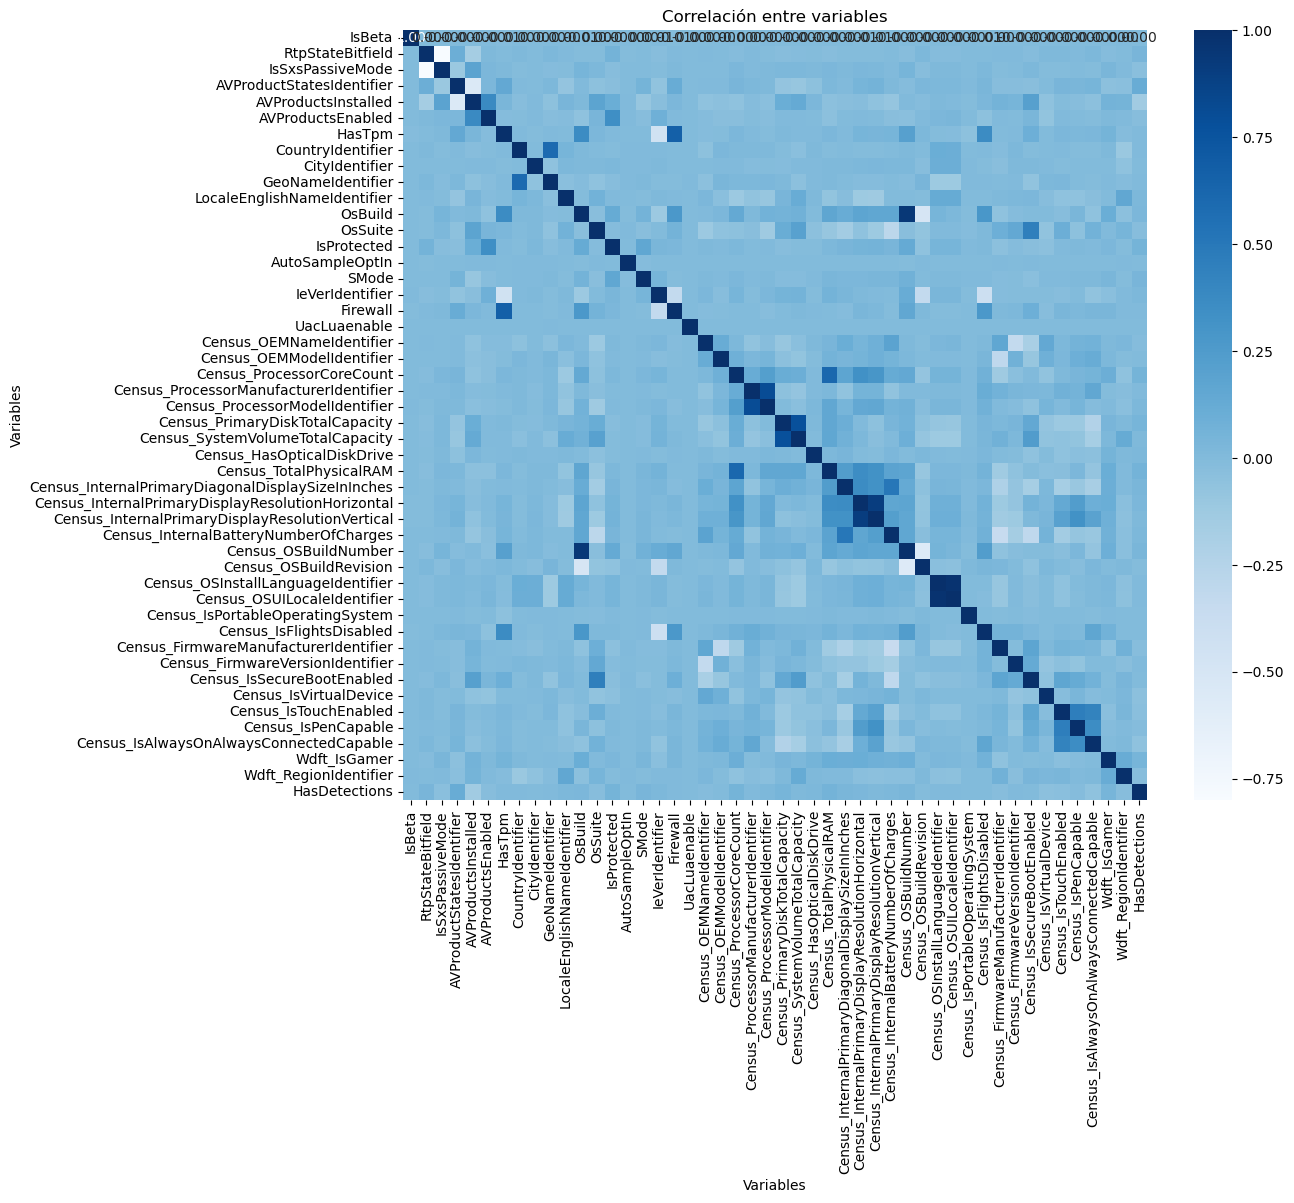

In [19]:

# para hacer la correlacion necesitamos datos numericos. Hacer un OneHotEncoding aqui seria una locura generando una barbaridad de columnas 
# Agrupamos variables numericas.
df_num= df_filtered.select_dtypes(include='number')
df_num

# Creamos matriz de correlacion
correlation_matrix = df_num.corr()
# Creamos la figura y el eje
plt.figure(figsize=(12, 10))

# Creamos el heatmap de correlación
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt=".2f")

# Añadimos título y etiquetas de los ejes
plt.title('Correlación entre variables')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostramos el heatmap
plt.show()


In [114]:
# para hacer la correlacion necesitamos datos numericos. Hacer un OneHotEncoding aqui seria una locura generando una barbaridad de columnas 
# Agrupamos variables numericas.
df_num= df_filtered.select_dtypes(include='number')
df_num

# Creamos matriz de correlacion
correlation_matrix = df_num.corr()

# Creamos heatmap de correlación
px.imshow(correlation_matrix, x=correlation_matrix.index, y=correlation_matrix.columns,
                color_continuous_scale="blues",
                title='Correlación entre variables',
                width=1300, height=1200)


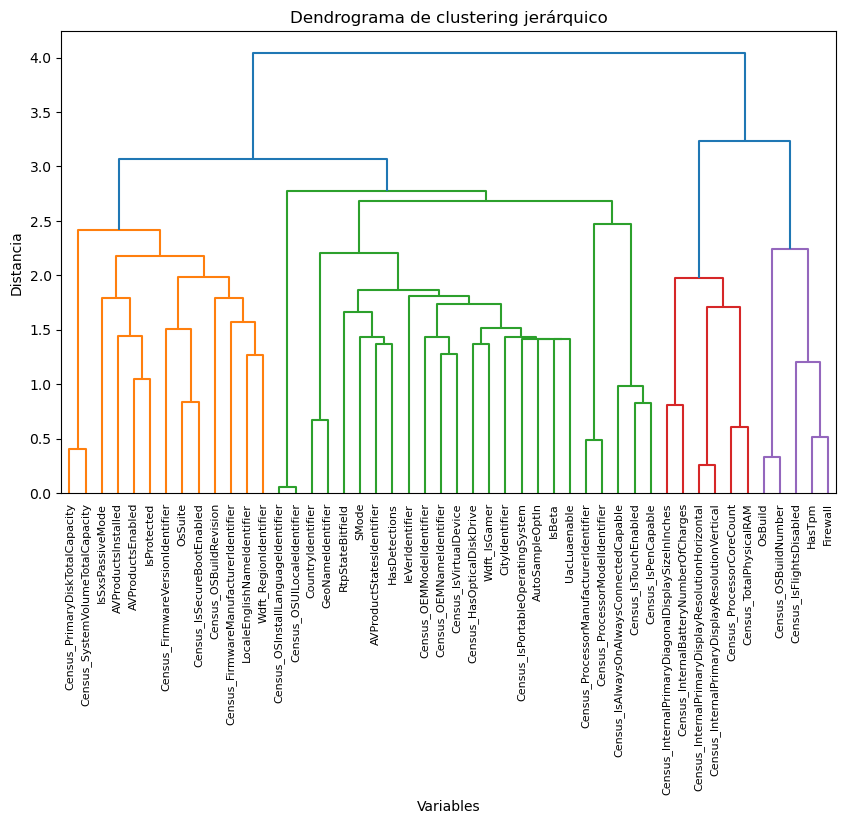

In [126]:
from scipy.cluster import hierarchy

df_num= df_filtered.select_dtypes(include='number')
df_num

# Creamos matriz de correlacion
correlation_matrix = df_num.corr()


# Aplicar clustering jerárquico a la matriz de correlación
clusters = hierarchy.linkage(correlation_matrix, method='ward')

# Dibujar el dendrograma para visualizar los clusters
plt.figure(figsize=(10, 6))
dn = hierarchy.dendrogram(clusters, labels=correlation_matrix.columns, leaf_rotation=90)
plt.title('Dendrograma de clustering jerárquico')
plt.xlabel('Variables')
plt.ylabel('Distancia')
plt.show()


In [131]:
# La idea es extraer una lista de las features mas correlacionadas entre si para luego condensarlas en nuestro df original
# filtrar las correlaciones mayores a 0.5 y distintas de 1
filtered_correlation = correlation_matrix.abs()[(correlation_matrix.abs() > 0.5) & (correlation_matrix.abs() != 1)]

# Eliminar las filas y columnas que contienen todos los valores nulos
filtered_correlation = filtered_correlation.dropna(axis=0, how='all')
filtered_correlation = filtered_correlation.dropna(axis=1, how='all')
# Obtenemos matriz
filtered_correlation


,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,HasTpm,CountryIdentifier,GeoNameIdentifier,OsBuild,Firewall,Census_ProcessorCoreCount,...,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier
RtpStateBitfield,NaN,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsSxsPassiveMode,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVProductStatesIdentifier,NaN,NaN,NaN,0.54,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVProductsInstalled,NaN,NaN,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HasTpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryIdentifier,NaN,NaN,NaN,NaN,NaN,NaN,0.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GeoNameIdentifier,NaN,NaN,NaN,NaN,NaN,0.60,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OsBuild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.94,NaN,NaN,NaN
Firewall,NaN,NaN,NaN,NaN,0.67,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Census_ProcessorCoreCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# Extraemos las features mas correladas

correlation_dict = {'column_corr1': [], 'indice_df': [], 'value_corr': []}

# Recorrer las filas y columnas de la matriz de correlación filtrada
for column in filtered_correlation.columns:
    for index, value in filtered_correlation[column].items():
        # Verificar si el valor no es nulo
        if not pd.isnull(value):
            # Almacenar los valores en el diccionario
            correlation_dict['column_corr1'].append(column)
            correlation_dict['indice_df'].append(index)
            correlation_dict['value_corr'].append(value)

# Convertir el diccionario en un DataFrame
correlation_df = pd.DataFrame(correlation_dict)

# Eliminar las filas duplicadas basadas en los valores de 'value_corr'
correlation_df = correlation_df.drop_duplicates(subset='value_corr')

correlation_df.sort_values(by='value_corr',ascending=False)



,column_corr1,indice_df,value_corr
22,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,0.98
7,OsBuild,Census_OSBuildNumber,0.94
16,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,0.91
10,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,0.81
0,RtpStateBitfield,IsSxsPassiveMode,0.80
12,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,0.78
4,HasTpm,Firewall,0.67
9,Census_ProcessorCoreCount,Census_TotalPhysicalRAM,0.61
5,CountryIdentifier,GeoNameIdentifier,0.60
20,Census_OSBuildNumber,Census_OSBuildRevision,0.56


In [138]:
correlation_df.iloc[1]

column_corr1    AVProductStatesIdentifier
indice_df             AVProductsInstalled
value_corr                           0.54
Name: 2, dtype: object

In [ ]:
df_filtered['']

In [141]:
import pandas as pd
import phik
from phik import resources, report

# open fake car insurance data
df_phi = df_filtered
df_phi.head()

# get the phi_k correlation matrix between all variables
df_phi.phik_matrix()

# get global correlations based on phi_k correlation matrix
df_phi.global_phik()

interval columns not set, guessing: ['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_IsPortableO

c:\Users\Usuario\anaconda3\Lib\site-packages\phik\data_quality.py:59: UserWarning:

The number of unique values of variable AvSigVersion is large: 6455. Are you sure this is not an interval variable? Analysis for pairs of variables including AvSigVersion can be slow.



c:\Users\Usuario\anaconda3\Lib\site-packages\phik\data_quality.py:59: UserWarning:

The number of unique values of variable MachineIdentifier is large: 500000. Are you sure this is not an interval variable? Analysis for pairs of variables including MachineIdentifier can be slow.



In [ ]:
import pandas as pd
import phik
from phik import resources, report

# open fake car insurance data
df_phi = df_filtered
df_phi.head()

# Pearson's correlation matrix between numeric variables (pandas functionality)
df_phi.corr()

# get the phi_k correlation matrix between all variables
df_phi.phik_matrix()

# get global correlations based on phi_k correlation matrix
df_phi.global_phik()

# get the significance matrix (expressed as one-sided Z)
# of the hypothesis test of each variable-pair dependency
df_phi.significance_matrix()

# contingency table of two columns
cols = ['mileage','car_size']
df_phi[cols].hist2d()

# normalized residuals of contingency test applied to cols
df_phi[cols].outlier_significance_matrix()

# show the normalized residuals of each variable-pair
df_phi.outlier_significance_matrices()

# generate a phik correlation report and save as test.pdf
report.correlation_report(df_phi, pdf_file_name='test.pdf')

Ya podemos ver que hay algunas variables que estan altamente correladas entre si

In [467]:
# Hacermos una tabla de correlacion con las variables numericas
df_num= df_filtered.select_dtypes(include='number')
df_num

df_corr= df_num.corr()

# y buscamos las correlacionadas con la variable target (HasDetection es la ultima columna de nuestro df)
target_corr= pd.DataFrame(df_corr.iloc[-1])
# ordenamos ya de paso
target_corr= target_corr.sort_values(by='HasDetections')
# pasamos a absoluto y ordenamos de mayor correlacion a menor
abs(target_corr).sort_values(by='HasDetections',ascending=False)

# Tenemos una correlacion maxima bastante baja y puede ser normal ya que la correlacion corr() esta utlizando la correlacion de Pearson que es lineal y no puede gestionar
# relaciones exponenciales... si me da tiempo investigaré mas sobre el tema, parece que existen otros tipos de correlaciones que si pueden analizar estas relaciones (PhiK)

# vamos a quedarnos con las primeras tres a modo de insight: las variables AVProductsInstalled ,AVProductStatesIdentifier y Census_TotalPhysicalRAM pueden ser importantes.

,HasDetections
HasDetections,1.0000
AVProductsInstalled,0.1392
AVProductStatesIdentifier,0.1165
Census_TotalPhysicalRAM,0.0604
Census_IsAlwaysOnAlwaysConnectedCapable,0.0593
IsProtected,0.0564
Census_ProcessorCoreCount,0.0539
Census_PrimaryDiskTotalCapacity,0.0472
Census_IsVirtualDevice,0.0457
Wdft_IsGamer,0.0455


In [469]:
# vamos a cambiar a ver cómo podemos trabajar las variables categoricas.

df_cat= df_filtered.select_dtypes(exclude='number')
df_cat

# tenemos 26 columnas de variables categoricas

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,Platform,Processor,OsVer,OsPlatformSubRelease,OsBuildLab,...,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing
0,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,10.0.17134.165,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:DM,Retail
1,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,10.0.17134.165,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:DM,Retail
2,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,windows10,x64,10.0.0.0,th2,10586.1176.amd64fre.th2_release_sec.170913-1848,...,10.0.10586.1176,amd64,th2_release_sec,Core,CORE,Update,Notify,IS_GENUINE,Retail,Retail
3,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,10.0.17134.286,amd64,rs4_release,Core,CORE,IBSClean,FullAuto,IS_GENUINE,Retail,Retail
4,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,10.0.17134.228,amd64,rs4_release,Professional,PROFESSIONAL,Update,FullAuto,IS_GENUINE,OEM:DM,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,a739cacc292f3f1e745827c1ca6c6ada,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1090.0,windows10,x64,10.0.0.0,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,...,10.0.16299.492,amd64,rs3_release_svc_escrow,Core,CORE,Upgrade,Notify,IS_GENUINE,OEM:DM,Retail
499996,a4c232d528d98343e8f1b73650da7b82,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1620.0,windows10,x64,10.0.0.0,rs3,16299.15.amd64fre.rs3_release.170928-1534,...,10.0.16299.309,amd64,rs3_release,Core,CORE,Upgrade,UNKNOWN,INVALID_LICENSE,Retail,Retail
499997,fd16cd542d660848d272e4552bcccb1e,win8defender,1.1.15300.5,4.13.17134.112,1.275.1343.0,windows10,x86,10.0.0.0,rs4,17134.1.x86fre.rs4_release.180410-1804,...,10.0.17134.285,x86,rs4_release,Professional,PROFESSIONAL,Upgrade,FullAuto,IS_GENUINE,Retail,Retail
499998,fa0841f8f6147de7c3d287e05270ed42,win8defender,1.1.15100.1,4.14.17639.18041,1.273.483.0,windows10,x64,10.0.0.0,rs3,16299.15.amd64fre.rs3_release.170928-1534,...,10.0.16299.371,amd64,rs3_release,Professional,PROFESSIONAL,Upgrade,FullAuto,IS_GENUINE,Retail,Retail


In [470]:
# vamos a intentar ver cuanta variabilidad de categorias hay por cada columna categorica, esto nos será util para hacernos una idea de si los valores se repiten mucho o no.

lista_var = []

# Itera sobre las columnas de df_cat
for col in df_cat.columns:
    # Utiliza value_counts para obtener la cantidad de valores únicos en cada columna
    unique_values_count = df_cat[col].value_counts().shape[0]
    
    # Añade la cantidad de valores únicos a la lista
    lista_var.append(unique_values_count)
lista_var

[500000,
 3,
 53,
 95,
 6455,
 4,
 3,
 21,
 9,
 454,
 8,
 12,
 3,
 4,
 34,
 9,
 305,
 3,
 15,
 22,
 21,
 9,
 6,
 4,
 6,
 8]

In [471]:
# Me preocupa que cuando vaya a hacer un OHE con las variables categoricas se me dispare el numero de columnas.

#  Asi que voy a ver de estas columnas categoricas como se distribuyen las distintas clases por % de aparacion. Pondremos un limite de 6 clases maximas.
resultados = []

# Iterar sobre las columnas del DataFrame
for col in df_cat.columns:
    # Calcular las frecuencias y los porcentajes
    frecuencias = df_cat[col].value_counts()
    porcentajes = frecuencias / len(df_cat)
    
    # Almacenar los nombres de las columnas y los 6 primeros porcentajes
    resultados.append([col] + list(porcentajes.head(6)))

# Crear un DataFrame con los resultados
df_perc_class = pd.DataFrame(resultados, columns=['Columna', 'Clase_1', 'Clase_2', 'Clase_3', 'Clase_4', 'Clase_5', 'Clase_6'])
df_perc_class.sort_values(by='Clase_1',ascending=False)


,Columna,Clase_1,Clase_2,Clase_3,Clase_4,Clase_5,Clase_6
12,Census_DeviceFamily,0.9984,0.0016,0.0000,NaN,NaN,NaN
1,ProductName,0.9892,0.0108,0.0000,NaN,NaN,NaN
7,OsVer,0.9677,0.0216,0.0106,0.0001,0.0000,0.0000
5,Platform,0.9661,0.0216,0.0106,0.0016,NaN,NaN
25,Census_FlightRing,0.9366,0.0321,0.0274,0.0012,0.0012,0.0011
17,Census_OSArchitecture,0.9089,0.0911,0.0000,NaN,NaN,NaN
6,Processor,0.9088,0.0911,0.0000,NaN,NaN,NaN
23,Census_GenuineStateName,0.8828,0.0900,0.0257,0.0015,NaN,NaN
15,Census_PowerPlatformRoleName,0.6928,0.2321,0.0549,0.0125,0.0041,0.0023
13,Census_PrimaryDiskTypeName,0.6509,0.2763,0.0416,0.0312,NaN,NaN


In [472]:
# En la df de arriba podemos ver la distribucion porcentual de las clases segun las distintas variables categoricas.

# Esto nos va a servir para filtrar aun mas las columnas, y reducir dimensionalidad pensando en el OHE. Las columnas donde las clases o son 99% de una clase o hay mucha 
# fragmentacion y (0.000001% de cada clase, ej: MachineIdentifier), no aportarán nada de valor al modelo asi que las eliminaremos.

# Nos interesará quedarnos con las variables que tengan cierta fragmentacion que pueda suponer un cambio sifgnificativo respecto a la variable target del modelo, por ejemplo,
# si AppVersion que es la version del antivirus (0.5776	0.0953	0.0404	0.0306	0.0288	0.0264)

col_drop_list= df_perc_class.query('Clase_1 >0.9 or Clase_1 <0.1 ').Columna.to_list()

# Aqui ya obtenemos los nombres de columnas que vamos a eliminar, hemos aplicado que tiene que haber menos de un 90% de dominancia de clase o mas de 10% de dominancia de clase.
# mas tarde si queremos podemos reajustar este filtro y eliminar más o menos columnas.

# resulta que hay un parametro en OHE que puede gestionar tanto el numero maximo de clases en una variable como la minima frecuencia. Lo veremos mas tarde (max_categories)

df_perc_class.query('Clase_1 >0.9 or Clase_1 <0.1 ').Columna.to_list()
# visualizamos las columnas categoricas que eliminaremos.

['MachineIdentifier',
 'ProductName',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'Census_DeviceFamily',
 'Census_OSArchitecture',
 'Census_FlightRing']

In [473]:
# hacemos lo lo mismo pero para las numericas (solo de caracter informativo...ya meteremos mano si queremos eliminar más columnas)
resultados = []

# Iterar sobre las columnas del DataFrame
for col in df_num.columns:
    # Calcular las frecuencias y los porcentajes
    frecuencias = df_num[col].value_counts()
    porcentajes = frecuencias / len(df_num)
    
    # Almacenar los nombres de las columnas y los 6 primeros porcentajes
    resultados.append([col] + list(porcentajes.head(6)))

# Crear un DataFrame con los resultados
df_perc_class_num = pd.DataFrame(resultados, columns=['Columna', 'Clase_1', 'Clase_2', 'Clase_3', 'Clase_4', 'Clase_5', 'Clase_6'])

# Mostrar el DataFrame de resultados
df_perc_class_num.sort_values(by='Clase_1',ascending=False)

,Columna,Clase_1,Clase_2,Clase_3,Clase_4,Clase_5,Clase_6
0,IsBeta,1.0000,0.0000,NaN,NaN,NaN,NaN
14,AutoSampleOptIn,1.0000,0.0000,NaN,NaN,NaN,NaN
36,Census_IsPortableOperatingSystem,0.9995,0.0005,NaN,NaN,NaN,NaN
18,UacLuaenable,0.9926,0.0062,0.0012,0.0000,0.0000,0.0000
41,Census_IsVirtualDevice,0.9911,0.0071,0.0018,NaN,NaN,NaN
6,HasTpm,0.9878,0.0122,NaN,NaN,NaN,NaN
2,IsSxsPassiveMode,0.9828,0.0172,NaN,NaN,NaN,NaN
37,Census_IsFlightsDisabled,0.9821,0.0179,0.0000,NaN,NaN,NaN
5,AVProductsEnabled,0.9704,0.0221,0.0039,0.0029,0.0006,0.0001
1,RtpStateBitfield,0.9697,0.0212,0.0037,0.0026,0.0023,0.0004


In [474]:
# Ahora eliminamos las columnas contenidas en la lista de columnas categoricas a eliminar siguiendo el criterio anteriormente descrito.

df_cat.drop(columns=col_drop_list,inplace=True, axis=1)
df_cat

# Hemos pasado de 26 antiguas columnas categoricas a 17 columnas.

# pasemos a hacer el OHE

,EngineVersion,AppVersion,OsPlatformSubRelease,OsBuildLab,SkuEdition,Census_MDC2FormFactor,Census_PrimaryDiskTypeName,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel
0,1.1.15100.1,4.18.1807.18075,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,Desktop,HDD,AllinOne,Desktop,10.0.17134.165,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:DM
1,1.1.15100.1,4.18.1807.18075,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,Notebook,HDD,Notebook,Mobile,10.0.17134.165,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:DM
2,1.1.15100.1,4.9.10586.1106,th2,10586.1176.amd64fre.th2_release_sec.170913-1848,Home,Convertible,SSD,Notebook,Mobile,10.0.10586.1176,th2_release_sec,Core,CORE,Update,Notify,IS_GENUINE,Retail
3,1.1.15200.1,4.18.1807.18075,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,Notebook,SSD,Notebook,Mobile,10.0.17134.286,rs4_release,Core,CORE,IBSClean,FullAuto,IS_GENUINE,Retail
4,1.1.15200.1,4.18.1807.18075,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,Notebook,HDD,Portable,Mobile,10.0.17134.228,rs4_release,Professional,PROFESSIONAL,Update,FullAuto,IS_GENUINE,OEM:DM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.1.15200.1,4.18.1807.18075,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,Convertible,HDD,Convertible,Mobile,10.0.16299.492,rs3_release_svc_escrow,Core,CORE,Upgrade,Notify,IS_GENUINE,OEM:DM
499996,1.1.15100.1,4.18.1807.18075,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,Notebook,SSD,Laptop,Mobile,10.0.16299.309,rs3_release,Core,CORE,Upgrade,UNKNOWN,INVALID_LICENSE,Retail
499997,1.1.15300.5,4.13.17134.112,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,Desktop,HDD,MiniTower,Desktop,10.0.17134.285,rs4_release,Professional,PROFESSIONAL,Upgrade,FullAuto,IS_GENUINE,Retail
499998,1.1.15100.1,4.14.17639.18041,rs3,16299.15.amd64fre.rs3_release.170928-1534,Pro,Notebook,HDD,Notebook,Mobile,10.0.16299.371,rs3_release,Professional,PROFESSIONAL,Upgrade,FullAuto,IS_GENUINE,Retail


### 3.2 Encoding

In [475]:
# Hemos decidido utilizar el OHE en lugar del get_dummies() de pandas porque me parece mas flexible en sus parametros. Ademas otro tipo de encoding no seria aplicable.

from sklearn.preprocessing import OneHotEncoder


# (sparse=False) en caso de querer matriz densa(guarda 0s). El valor por defecto (True) se recomienda cuando los datos son muy grandes.
# fijamos en 6 las categorias maximas por clase con el objetivo de limitar el numero de columnas (aumento dimensionalidad)
encoder = OneHotEncoder(sparse= False,max_categories=6)

# Ajustar y transformar las columnas categóricas
df_cat_encoded = encoder.fit_transform(df_cat)

# Crear un DataFrame con las columnas categóricas codificadas
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=encoder.get_feature_names_out(df_cat.columns))

# Concatenar el DataFrame con columnas numéricas (df_num) y el DataFrame codificado
df_encoded = pd.concat([df_num, df_cat_encoded], axis=1)
df_encoded

# Tenemos 146 columnas despues del encoding. A ver como reacciona el modelo con esta carga de columnas, me preocupa demasiada dimensionalidad.

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_GenuineStateName_INVALID_LICENSE,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,Census_ActivationChannel_OEM:DM,Census_ActivationChannel_OEM:NONSLP,Census_ActivationChannel_Retail,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_ActivationChannel_infrequent_sklearn
0,0,7.0000,0,53447.0000,1.0000,1.0000,1,8,85219.0000,205.0000,...,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0,7.0000,0,53447.0000,1.0000,1.0000,1,129,54198.0000,126.0000,...,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0,7.0000,0,46781.0000,2.0000,1.0000,1,149,122689.0000,181.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
3,0,7.0000,0,53447.0000,1.0000,1.0000,1,164,114587.0000,205.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
4,0,7.0000,0,47238.0000,2.0000,1.0000,1,207,72421.0000,277.0000,...,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,7.0000,0,53447.0000,1.0000,1.0000,1,85,129210.0000,53.0000,...,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
499996,0,7.0000,0,53447.0000,1.0000,1.0000,1,149,80920.0000,181.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
499997,0,7.0000,0,53447.0000,1.0000,1.0000,1,93,4342.0000,119.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
499998,0,7.0000,0,43856.0000,2.0000,1.0000,1,195,10222.0000,258.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000


<a id='seccion4'></a>
## 4. Modelizacion

### 4.1 Train Test Split

In [476]:
# antes de tirar el primer modelo dividimos en train y test la muestra. Veremos mas tarde si queremos hacerlo al principio, de momento probamos aqui.
from sklearn.model_selection import train_test_split

X= df_encoded.drop(columns='HasDetections')
y=df_encoded['HasDetections']

# vamos a utilizar Random-hold-out como estrategia de validacion ya que tenemos un tamaño de dato suficientemente grande: partición en train/test con un porcentaje de test del 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 123)

In [477]:
# vamos a tirar a lo bruto un Random forest a ver que pasa.

from sklearn.ensemble import RandomForestClassifier

# Instanciación del modelo
clf = RandomForestClassifier() 

# Entrenamiento del modelo
clf.fit(X_train, y_train)

# Obtenemos metricas Random Forest

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# Obtener predicciones del modelo
y_pred = clf.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}") 
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.6159333333333333
Precision: 0.6185598777301188
Recall: 0.6075003934196032
F1-Score: 0.6129802554033503
AUC-ROC: 0.6159444897757917
Confusion Matrix:
[[51444 30947]
 [32424 50185]]


 Las metricas no son muy esperanzadoras (accuracy=0.617) , son algo mejor que tirar una moneda al aire (Accuracy=0.5).
 Vamos a decidir qué metricas son más importantes en nuestro modelo y por qué:

 En el problema que queremos resolver (Malware detection) considero que es importante detectar a todos los positivos reales mas que tener un poco de imprecision prediciendo mal 
 y dando lugar a falsos negativos (falsos negativos menos importantes). Quiero decir, si tengo infectado 100 ordenadores y 98 los detecto, puedo iniciar acciones contra ese malware
 (formateo, antivirus nuevo, cambiar piezas hardware afectadas...) pero si se me escapan esos 2, podrían infectar de nuevo el conjunto de 100 ordenadores, a mi parecer algo mas
 costoso y riesgoso que ''sacriificar'' 2 ordenadores sanos creyendo que estan infectados. 
 Me interesa que mi modelo tenga la maxima sensibilidad.

 Asi que la metrica que deberiamos priorizar sería el Recall (Falsos negativos importantes). Por el momento voy a verlas todas en global a ver qué diferencias hay.

### 4.2 Evaluacion en paralelo de modelos de clasificacion

In [478]:
# Una vez en este punto vamos a tirar en paralelo varios modelos distintos para evaluar de una forma superficial cual puede funcionar mejor para mas tarde centrarnos en el y potenciarlo
# FineTunning.

# Los modelos que usaremos serán algunos basados en ensembles (RandomForest, GradientBoosting y XGBoost) y por probar el Logistic Regression (Descartados : SVM y KNN)

In [479]:
# importamos los distintos modelos a utilizar
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# y las metricas a utilizar ya las importamos antes...


In [480]:
# Creamos una tabla para almacenar las metricas dadas por cada modelo y poder compararlos
tabla_metricas_baseline = pd.DataFrame(columns = ['Modelo', 'Accuracy', 'Precision','Recall','F1-Score','AUC-ROC'])

# y definimos una funcion que me permita testear los distintos modelos y almacenarlos en la tabla anterior ('For the sake of my typing fingers!')
def test_model(model,nombre_modelo,X_train,y_train, X_test ,y_test):
    # Instanciación del modelo
    clf = model() 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    # Añadimos las metricas obtenidas a nuestro tabla de metricas
    tabla_metricas_baseline.loc[len(tabla_metricas_baseline)] = [nombre_modelo, round(accuracy,3), round(precision,3), round(recall,3), round(f1,3),round(roc_auc,3)]
    
    return clf

In [481]:
# Probamos con Random Forest
Random_Forest_trained= test_model(RandomForestClassifier,'Random Forest',X_train,y_train, X_test ,y_test)
# 4m 31 de procesado

In [482]:
# Probamos con Gradient Boosting
Gradient_boosting_trained= test_model(GradientBoostingClassifier,'Gradient_Boosting',X_train,y_train, X_test ,y_test)
# 4m33 de procesado 

In [483]:
# Probamos con XGBoost
XGBoost_trained= test_model(XGBClassifier,'XGBoost',X_train,y_train, X_test ,y_test)

# solo 7,5segundo de procesado? inccreible

In [484]:
# Probamos con Logistic Regression
Logistic_regression_trained= test_model(LogisticRegression,'Logisitc_Regression',X_train,y_train, X_test ,y_test)
# 1,7segundos de procesado? demasiado bonito para creermelo

In [485]:
# Probamos con SVM
# test_model(SVC,'SVM',X_train,y_train, X_test ,y_test)

# tras mas de 175m de procesado, abandonamos la opcion de probar este modelo por el momento. ponemos funcion comentada para evitar que corra el codigo.

In [486]:
# Probamos con KNN
# test_model(KNeighborsClassifier,'KNN',X_train,y_train, X_test ,y_test)

# Error en procesado...pasamos de este tambien

### 4.3 Resultados evaluacion paralela Modelos Clasificacion

In [487]:
# Visualizamos tabla de metricas.
tabla_metricas_baseline

# Parece ser que el Logistic regression es el modelo que mejor recall tiene... pero el resto de valores me parecen muy poco convincentes, asi que descartaremos este modelo ya
# que me parece bastante irreal. Aparte despues en la visualizacion de feature importance vi que aplicaba toda la importancia a una sola variable y a l resto 0...asi que descartamos



,Modelo,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Random Forest,0.6170,0.6200,0.6090,0.6150,0.6170
1,Gradient_Boosting,0.6150,0.6050,0.6690,0.6350,0.6150
2,XGBoost,0.6310,0.6250,0.6560,0.6400,0.6310
3,Logisitc_Regression,0.5010,0.5010,0.9940,0.6660,0.5000


### 4.4 Feature Importance: XGBoost y Random Forest

Ahora evaluaremos las variables mas importantes de los dos modelos que hemos elegido para ver si hay diferencias. Posteriormente nos centraremos en esas variables clave para hacer un mejor analisis y tratamiento de datos.

De momento hemos seleccionado el XGBoost y Random Forest

XGBoost

In [488]:
# XGBOOOOOOOOOST
# Ahora vamos a visualizar la importancia de cada variable (Feature importance) para nuestro modelo de XGBoost. 
# De aqui quizas podemos sacar algun insight para mas tarde afinar mas el modelo. 

import plotly.express as px

importance = XGBoost_trained.feature_importances_

idxs = np.argsort(importance)

XGBoost_importance = pd.DataFrame({
    'Feature': [df_encoded.columns[i] for i in idxs],
    'Importance': importance[idxs]
})

# Plotting with Plotly
fig = px.bar(XGBoost_importance, x='Importance', y='Feature', orientation='h',
             title="Feature Importance (XGBoost)",
             labels={'Importance': 'XGBoost Feature Importance'})
fig.update_layout(width=800, height=600)
fig.show()

# Obtenemos una tabla con las importancias de las variables.

XGBoost_importance.sort_values(by= 'Importance',ascending=False)

# De momento vemos un punto de corte importante(cambio de la pendiente)
# podría ser interesante probar a eliminar esas variables menos importantes y volver a probar el modelo (Optimizacion?)

,Feature,Importance
144,AVProductsInstalled,0.1202
143,Census_IsVirtualDevice,0.0360
142,Census_OSSkuName_CORE_COUNTRYSPECIFIC,0.0327
141,EngineVersion_1.1.15000.2,0.0292
140,Census_PowerPlatformRoleName_SOHOServer,0.0253
...,...,...
3,Census_IsPortableOperatingSystem,0.0000
2,Census_OSSkuName_CORE,0.0000
1,Census_OSWUAutoUpdateOptionsName_UNKNOWN,0.0000
4,Census_ActivationChannel_Volume:MAK,0.0000


In [489]:
XGBoost_importance.query('Importance > 0.01').sort_values(by='Importance' ,ascending=False)

# y almacenamos columnas de importancia en una lista:
XGB_col_imp= df_plotly.query('Importance > 0.01').sort_values(by='Importance' ,ascending=False).Feature.to_list()
XGB_col_imp


# ponemos punto de corte en 0.01 agrupando columnas.
# obtenemos 22 columnas importantes para el modelo de XGBoost. 

['AVProductsInstalled',
 'Census_IsVirtualDevice',
 'Census_OSSkuName_CORE_COUNTRYSPECIFIC',
 'EngineVersion_1.1.15000.2',
 'Census_PowerPlatformRoleName_SOHOServer',
 'Census_OSInstallTypeName_Other',
 'Census_TotalPhysicalRAM',
 'Census_OSEdition_CoreCountrySpecific',
 'EngineVersion_1.1.14600.4',
 'EngineVersion_1.1.15100.1',
 'IsProtected',
 'Census_OSVersion_10.0.17134.285',
 'Census_ActivationChannel_Retail',
 'AVProductStatesIdentifier',
 'Census_OSVersion_10.0.17134.165',
 'AppVersion_4.18.1806.18062',
 'EngineVersion_1.1.14901.4',
 'Wdft_IsGamer',
 'AppVersion_4.18.1807.18075',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Census_PrimaryDiskTotalCapacity',
 'AppVersion_4.13.17134.1']

Random Forest

In [490]:
import plotly.express as px

importance = Random_Forest_trained.feature_importances_
idxs = np.argsort(importance)

RF_importance = pd.DataFrame({
    'Feature': [df_encoded.columns[i] for i in idxs],
    'Importance': importance[idxs]
})

# Plotting
fig = px.bar(RF_importance, x='Importance', y='Feature', orientation='h',
             title="Feature Importance (Random Forest)",
             labels={'Importance': 'Random Forest Feature Importance'})
fig.update_layout(width=800, height=600)
fig.show()


RF_importance.sort_values(by= 'Importance',ascending=False)

# Vamos a hacer una tabla del feature importance para saber el punto exacto donde hemos de hacer el corte (cambio de pendiente, segun el grafico de plotly mas, yo elegiría el 0.0057 o cerca)
# Para la creacion del grafico de plotly ya tenemos la tabla creada, asi que primero la ordenamos y printeamospara mas tarde hacer un query.

,Feature,Importance
144,CityIdentifier,0.0549
143,Census_SystemVolumeTotalCapacity,0.0535
142,Census_FirmwareVersionIdentifier,0.0510
141,Census_OEMModelIdentifier,0.0471
140,Census_ProcessorModelIdentifier,0.0463
...,...,...
4,Census_IsPortableOperatingSystem,0.0001
3,Census_OSWUAutoUpdateOptionsName_UNKNOWN,0.0000
2,Census_ActivationChannel_Volume:MAK,0.0000
1,AutoSampleOptIn,0.0000


In [491]:
# obtenemos las columnas que son importantes para el modelo (importance>0.006)


RF_importance.query('Importance > 0.006').sort_values(by='Importance' ,ascending=False)

# y almacenamos columnas de importancia en una lista:
RF_col_imp= RF_importance.query('Importance > 0.006').sort_values(by='Importance' ,ascending=False).Feature.to_list()
RF_col_imp

# vemos que hay 29 columnas potencialmente importantes
# tambien vemos que solo tres columnas corresponden a una codificacion del OHE: 'EngineVersion_1.1.15000.2', 'Census_OSInstallTypeName_Other' y'Census_ActivationChannel_OEM:NONSLP'
# Esto me sugiere que la mayoria de las columnas importantes son originalmente de tipo numerico (no han sufrico OHE)

['CityIdentifier',
 'Census_SystemVolumeTotalCapacity',
 'Census_FirmwareVersionIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'CountryIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_OSBuildRevision',
 'AVProductStatesIdentifier',
 'Census_OEMNameIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Wdft_RegionIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSInstallLanguageIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalBatteryNumberOfCharges',
 'AVProductsInstalled',
 'IeVerIdentifier',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_ProcessorCoreCount',
 'Wdft_IsGamer',
 'EngineVersion_1.1.15000.2',
 'Census_IsSecureBootEnabled',
 'Census_OSInstallTypeName_Other']

In [492]:
# vamos a ver cuantas columnas importantes son comunes para ambos modelos.
XGB_col_series = pd.Series(XGB_col_imp)
RF_col_series = pd.Series(RF_col_imp)

commons = XGB_col_series[XGB_col_series.isin(RF_col_series)].to_list()
commons

# nos quedamos con 7 columnas potencialmente importantes para los modelos.
# ahora vamos a volver a tirar el XGBoost utilizando unicamente esas columnas para ver si hay cambios. La idea es intentar disminuir el ruido del modelo...quizas de esta forma el
# KNN y SVM podria funcionar


['AVProductsInstalled',
 'EngineVersion_1.1.15000.2',
 'Census_OSInstallTypeName_Other',
 'Census_TotalPhysicalRAM',
 'AVProductStatesIdentifier',
 'Wdft_IsGamer',
 'Census_PrimaryDiskTotalCapacity']

In [493]:
# Veamos graficamente si hay muchas diferencias entre las importancias para cada modelo.
XGBoost_importance.rename(columns={'Importance': 'XGB_feat_imp'}, inplace=True)

RF_importance.rename(columns={'Importance': 'RF_feat_imp'}, inplace=True)

df_importances= XGBoost_importance.merge(RF_importance,on='Feature')
df_importances.sort_values(by='XGB_feat_imp',ascending=False,inplace=True)
df_importances

fig = px.bar(df_importances, y='Feature', x=['RF_feat_imp', 'XGB_feat_imp'], orientation='h',
             title='Importancia de las características (RF vs XGB)',
             labels={'value': 'Importancia', 'variable': 'Modelo'},
             color_discrete_map={'RF_feat_imp': 'blue', 'XGB_feat_imp': 'green'})
fig.update_layout(width=800, height=600)
fig.show()

# existen variables que son muy importantes para un modelo mientras que otras no son importantes en absoluto para el otro modelo. Creo que con tiempo se podria ir filtrando 
# empiricamente estas columnas y quedarnos realmente con las importantes.

<a id='seccion5'></a>
## 5. First Iteracion: XGBoost con CV seleccionando unicamente las columnas que son importantes.

Seleccionamos XGBoost como modelo clasificador para entrenarlo con solo 7 columnas + target para ver si mejora las metricas al reducir la dimensionalidad.

El preprocesamiento es igual que el que hemos utilizado anteriormente. Copio codigo directamente y modifico (esto deberia hacer una funcion tranquilamente, pero el tiempo apremia)


In [494]:
commons
# Esta es la lista de las columnas que queremos filtrar.

['AVProductsInstalled',
 'EngineVersion_1.1.15000.2',
 'Census_OSInstallTypeName_Other',
 'Census_TotalPhysicalRAM',
 'AVProductStatesIdentifier',
 'Wdft_IsGamer',
 'Census_PrimaryDiskTotalCapacity']

In [495]:


df_1=pd.read_csv('sample_mmp.csv',encoding='UTF-8',sep=',',index_col=0).reset_index(drop=True)
df_1.Census_PrimaryDiskTotalCapacity = df_1.Census_PrimaryDiskTotalCapacity.astype(float)
df_1.SMode= df.SMode.astype(float)
df_1

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7988\551023361.py:1: DtypeWarning:

Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.



,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0000,0,NaN,53447.0000,...,19951.0000,0,NaN,0.0000,0,0,0.0000,0.0000,11.0000,1
1,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0000,0,NaN,53447.0000,...,48753.0000,0,0.0000,0.0000,0,0,0.0000,1.0000,3.0000,0
2,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0000,0,NaN,46781.0000,...,33111.0000,1,0.0000,0.0000,1,1,0.0000,0.0000,15.0000,0
3,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0000,0,NaN,53447.0000,...,48473.0000,1,NaN,0.0000,0,0,0.0000,0.0000,15.0000,1
4,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0000,0,NaN,47238.0000,...,4343.0000,1,NaN,0.0000,1,0,0.0000,1.0000,13.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,a739cacc292f3f1e745827c1ca6c6ada,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1090.0,0,7.0000,0,NaN,53447.0000,...,33088.0000,1,0.0000,0.0000,1,0,0.0000,1.0000,10.0000,0
499996,a4c232d528d98343e8f1b73650da7b82,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1620.0,0,7.0000,0,NaN,53447.0000,...,NaN,0,NaN,0.0000,0,0,0.0000,0.0000,15.0000,0
499997,fd16cd542d660848d272e4552bcccb1e,win8defender,1.1.15300.5,4.13.17134.112,1.275.1343.0,0,7.0000,0,NaN,53447.0000,...,41727.0000,0,NaN,0.0000,0,0,0.0000,0.0000,8.0000,0
499998,fa0841f8f6147de7c3d287e05270ed42,win8defender,1.1.15100.1,4.14.17639.18041,1.273.483.0,0,7.0000,0,NaN,43856.0000,...,11947.0000,0,NaN,0.0000,0,0,0.0000,0.0000,1.0000,0


In [496]:
# Filtramos solo las columnas que nos interesan que estan presentes tanto en la feature importance del Random forest como el de XGBoost (8)



# nos salta error que las siguientes columnas no estan en el df_1. Se debe al OHE. Modificamos lista de columnas a filtrar incluyento el nombre de columna antes del encoding.

commons.remove('EngineVersion_1.1.15000.2')
commons.remove( 'Census_OSInstallTypeName_Other')

commons.append('Census_OSInstallTypeName')
commons.append('EngineVersion')
# añadimos variable target
commons.append('HasDetections')


# "['EngineVersion_1.1.15000.2', 'Census_OSInstallTypeName_Other'] not in index

In [497]:
df_1= df_1[commons]
df_1

,AVProductsInstalled,Census_TotalPhysicalRAM,AVProductStatesIdentifier,Wdft_IsGamer,Census_PrimaryDiskTotalCapacity,Census_OSInstallTypeName,EngineVersion,HasDetections
0,1.0000,8192.0000,53447.0000,0.0000,953869.0000,UUPUpgrade,1.1.15100.1,1
1,1.0000,8192.0000,53447.0000,1.0000,476940.0000,UUPUpgrade,1.1.15100.1,0
2,2.0000,8192.0000,46781.0000,0.0000,244198.0000,Update,1.1.15100.1,0
3,1.0000,8192.0000,53447.0000,0.0000,228936.0000,IBSClean,1.1.15200.1,1
4,2.0000,4096.0000,47238.0000,1.0000,476940.0000,Update,1.1.15200.1,1
...,...,...,...,...,...,...,...,...
499995,1.0000,4096.0000,53447.0000,1.0000,476940.0000,Upgrade,1.1.15200.1,0
499996,1.0000,8192.0000,53447.0000,0.0000,115712.0000,Upgrade,1.1.15100.1,0
499997,1.0000,4096.0000,53447.0000,0.0000,476940.0000,Upgrade,1.1.15300.5,0
499998,2.0000,6144.0000,43856.0000,0.0000,715404.0000,Upgrade,1.1.15100.1,0


In [498]:
for i in df_1.columns:
    if df_1[i].isna().sum() != 0:
        # Verificar si todos los valores únicos son numéricos, devolverá false si existe alguno no numerico(lo transforma en NaN y luego en serie booleana al pasar el notna().Al pasar el all devuelve si al menos es NaN..>no es numerica esa columna)
        if pd.to_numeric(df_1[i], errors='coerce').notna().all():
            # Para datos binarios aplicamos la moda
            if df_1[i].max() == 1 and df_1[i].min() == 0:
                df_1[i].fillna(value=-1, inplace=True)
        
        # Para datos string aplicamos palabra ''UNKNOWN'
        elif df_1[i].dtype == 'O':  # 'O' representa datos de tipo string en pandas
            df_1[i].fillna('UNKNOWN', inplace=True)

        # Para datos numéricos continuos aplicamos la mediana.
        else:
            df_1[i].fillna(value=-1, inplace=True)


df_1.isna().sum()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7988\2122133768.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



AVProductsInstalled                0
Census_TotalPhysicalRAM            0
AVProductStatesIdentifier          0
Wdft_IsGamer                       0
Census_PrimaryDiskTotalCapacity    0
Census_OSInstallTypeName           0
EngineVersion                      0
HasDetections                      0
dtype: int64

In [499]:
# generamos la df de columnas cat 
df_1_cat= df_1.select_dtypes(include=object)

# y las columnas numericas
df_1_num= df_1.select_dtypes(include='number')

In [500]:
from sklearn.preprocessing import OneHotEncoder


# (sparse=False) en caso de querer matriz densa(guarda 0s). El valor por defecto (True) se recomienda cuando los datos son muy grandes.
encoder = OneHotEncoder(sparse= False ,max_categories=6)

# Ajustar y transformar las columnas categóricas
df_1_cat_encoded = encoder.fit_transform(df_1_cat)

# Crear un DataFrame con las columnas categóricas codificadas
df_1_cat_encoded = pd.DataFrame(df_1_cat_encoded, columns=encoder.get_feature_names_out(df_1_cat.columns))

# Concatenar el DataFrame con columnas numéricas (df_num) y el DataFrame codificado
df_1_encoded = pd.concat([df_1_num, df_1_cat_encoded], axis=1)

# Mostrar el DataFrame original y el DataFrame después de la codificación
df_1_encoded

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,AVProductsInstalled,Census_TotalPhysicalRAM,AVProductStatesIdentifier,Wdft_IsGamer,Census_PrimaryDiskTotalCapacity,HasDetections,Census_OSInstallTypeName_IBSClean,Census_OSInstallTypeName_Other,Census_OSInstallTypeName_UUPUpgrade,Census_OSInstallTypeName_Update,Census_OSInstallTypeName_Upgrade,Census_OSInstallTypeName_infrequent_sklearn,EngineVersion_1.1.14600.4,EngineVersion_1.1.14901.4,EngineVersion_1.1.15000.2,EngineVersion_1.1.15100.1,EngineVersion_1.1.15200.1,EngineVersion_infrequent_sklearn
0,1.0000,8192.0000,53447.0000,0.0000,953869.0000,1,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,1.0000,8192.0000,53447.0000,1.0000,476940.0000,0,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,2.0000,8192.0000,46781.0000,0.0000,244198.0000,0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,1.0000,8192.0000,53447.0000,0.0000,228936.0000,1,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
4,2.0000,4096.0000,47238.0000,1.0000,476940.0000,1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.0000,4096.0000,53447.0000,1.0000,476940.0000,0,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
499996,1.0000,8192.0000,53447.0000,0.0000,115712.0000,0,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
499997,1.0000,4096.0000,53447.0000,0.0000,476940.0000,0,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
499998,2.0000,6144.0000,43856.0000,0.0000,715404.0000,0,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [501]:
# dividimos train test
from sklearn.model_selection import train_test_split

X= df_1_encoded.drop(columns='HasDetections')
y=df_1_encoded['HasDetections']

# vamos a utilizar Random-hold-out como estrategia de validacion ya que tenemos un tamaño de dato suficientemente grande: partición en train/test con un porcentaje de test del 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 123)

In [502]:
import xgboost as xgb
from xgboost import XGBClassifier

# Instanciación del modelo
clf_1 = XGBClassifier() 

# Entrenamiento del modelo
clf_1.fit(X_train, y_train)

# entrenamos nuevamente el modelo elegido para validar si funciona mejor con menos columnas. Lo entrenamos de-novo para que no haya data-leaking.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### 5.1 Validacion

In [503]:
from sklearn.model_selection import RepeatedKFold, cross_validate

cv = RepeatedKFold(
    n_splits=5, # Número de particiones de CV 
    n_repeats=5 # Númro de repeticiones de CV
)

cv_results = cross_validate(
    clf_1,
    X,
    y,
    cv = cv, # Objeto CV definido arriba
    scoring = ['recall', 'accuracy','f1','roc_auc'],
    n_jobs = -1,
)

cv_results

{'fit_time': array([14.48282886, 15.66132712, 14.68084836, 15.85310912, 14.75187349,
        15.226578  , 14.51873589, 15.34818816, 14.27629972, 14.68254709,
        14.50228047, 15.32399535, 14.87870836, 15.5395484 , 15.604743  ,
        15.77081132, 14.19367886, 14.0041821 , 15.34014559, 14.74471998,
        14.3608923 , 15.68531966, 15.57498431, 15.87722301,  7.54770136]),
 'score_time': array([1.96768427, 1.87819886, 1.93902588, 1.76744199, 1.89822769,
        1.93942928, 1.96985173, 1.96930909, 2.13051939, 2.11863136,
        2.1254077 , 1.93024468, 1.84941506, 1.76214576, 1.84787202,
        1.77452183, 2.197263  , 2.17536116, 1.94070721, 2.05198407,
        2.11455059, 1.9174149 , 1.86647868, 1.64238167, 0.66806984]),
 'test_recall': array([0.6821151 , 0.67201519, 0.67584362, 0.67243315, 0.67521946,
        0.67210493, 0.67877473, 0.67476714, 0.68109048, 0.67753688,
        0.67123123, 0.67299894, 0.67425212, 0.67478058, 0.67459557,
        0.67362395, 0.67574337, 0.67571034, 0.

In [504]:

# Crear un DataFrame con los resultados de la validación cruzada
cv_results_df = pd.DataFrame({
    'Test': range(1, cv_results['test_recall'].shape[0] + 1),
    'Recall': cv_results['test_recall'],
    'Accuracy': cv_results['test_accuracy'],
    'F1 Score': cv_results['test_f1'],
    'ROC AUC': cv_results['test_roc_auc']
})

# Mostrar el DataFrame

cv_results_df
tabla_metricas_XGB = pd.DataFrame(columns = ['Metrica', 'Media', 'Std_devit'])

In [505]:
tabla_metricas_XGB = pd.DataFrame(columns = ['Metrica', 'Media', 'Std_devit'])
for i in cv_results_df.columns:
    if i=='Test':
        pass
    else:    
        tabla_metricas_XGB.loc[len(tabla_metricas_XGB)] = [i, 
                                                       np.round(np.mean(cv_results_df[i]), 4),
                                                       np.round(np.std(cv_results_df[i]), 4)]


### 5.2 Comprobacion resultados First Iteration

In [506]:
tabla_metricas_baseline

,Modelo,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Random Forest,0.6170,0.6200,0.6090,0.6150,0.6170
1,Gradient_Boosting,0.6150,0.6050,0.6690,0.6350,0.6150
2,XGBoost,0.6310,0.6250,0.6560,0.6400,0.6310
3,Logisitc_Regression,0.5010,0.5010,0.9940,0.6660,0.5000


In [507]:
tabla_metricas_XGB

# bueno parece que mejora las metricas respecto al modelo entrenado con mas columnas del principio.

,Metrica,Media,Std_devit
0,Recall,0.6755,0.0026
1,Accuracy,0.6101,0.0012
2,F1 Score,0.6340,0.0017
3,ROC AUC,0.6503,0.0011


Bueno parece que hay cierta mejora las metricas respecto al modelo entrenado con mas columnas del principio.

<a id='seccion6'></a>
## 6. Second Iteration: Random Forest, Gradient Boosting y XGBoost con optimizacion y cross validation: 7 features + target

In [508]:

import random

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

Aqui vamos a buscar que hiperparametros son los mejores para nuestro modelo. Testearemos nuevamente los 3 modelos elegidos(Random Forest, Gradient Boosting y XGBoost) para ver cual es el que mejor clasifica con unos determinados hiperparámetros.

El proceso es el siguiente:
1. Creacion diccionario con modelos e hiperparametros.
2. Busqueda de hiperparametros por medio de Randomized Search Cross Validation. Utilizamos este porque se ha visto empiricamente que funciona mejor que el GridSearch...y voy un poco escaso de tiempo a decir verdad.
3. Generamos un df donde almacenar las metricas de los 75 modelos testados sobre la que conjeturar.
4. Eleccion del mejor modelo y visualizacion de su performance.

### 6.1 Implementacion Randomized Search con Cross Validation

In [509]:
# Instanciamos los modelos y los almacenamos en un diccionario
# junto con los hiperparámetros que queramos optimizar 
classifiers = {
    
    'RandomForest': {
        'model': RandomForestClassifier(n_jobs = -1), 
        'hiperparameters': {
          'criterion': ["gini", "entropy"],
          'max_depth': randint(2, 10),
          'min_samples_leaf': randint(1, 5),
          'n_estimators': randint(10, 100)
        } # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    }, 
    'GradientBoosting': {
        'model': GradientBoostingClassifier(), 
        'hiperparameters': {
          'max_depth': randint(2, 10),
          'min_samples_leaf': randint(1, 5),
          'learning_rate': [0.2, 0.1, 0.01],
          'n_estimators': randint(10, 100)
        } # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
    },
    'XGBoost': {
        'model': XGBClassifier(objective = 'binary:logistic', n_jobs = -1), 
        'hiperparameters': {
          'max_depth': randint(2, 5),
          'n_estimators': randint(10, 100),
          'learning_rate': [0.2, 0.1, 0.01],
          'subsample': uniform(0.8, 0.2)
        } # https://xgboost.readthedocs.io/en/stable/parameter.html
    }
}

In [510]:
# Iteramos sobre el diccionario anterior, y mediante Random Search 
# vamos optimizando cada uno de los modelos y guardando los resultados
# en un pd.DataFrame

# En best estimators guardaremos los modelos con mejores metricas segun los hiperparametros optimizados

random_search_output = list()
best_estimators = {}
scoring_metrics = ['roc_auc', 'recall', 'accuracy']  # Agrega las métricas que necesitas

for clf_name, clf_info in classifiers.items():
    print(clf_name)
    clf_random_search = RandomizedSearchCV(
        estimator=clf_info['model'], 
        param_distributions=clf_info['hiperparameters'], 
        n_iter=25,
        cv=5,
        scoring=scoring_metrics,  # Utiliza las métricas que necesitas
        return_train_score=True,
        refit='recall',  # Refit utilizando recall, puedes elegir la métrica principal
        n_jobs=-1,
        verbose=3
    )
    clf_random_search.fit(X_train, y_train)
    
    # Resultados del Random Search
    df_output = pd.DataFrame(clf_random_search.cv_results_)
    df_output['clf'] = clf_name
    random_search_output.append(df_output)
    
    # Modelo re-entrenado con los hiperparámetros óptimos
    best_estimators[clf_name] = clf_random_search.best_estimator_

# hemos tardado 39 min de procesado

RandomForest
Fitting 5 folds for each of 25 candidates, totalling 125 fits


GradientBoosting
Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBoost
Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [511]:
df_results_1 = pd.concat(random_search_output).reset_index(drop=True)
df_results_1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_roc_auc,...,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy,clf,param_learning_rate,param_subsample
0,22.5917,0.6016,2.8441,0.1579,entropy,4,3,72,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.6307,...,0.5975,0.5979,0.5987,0.5971,0.5966,0.5975,0.0007,RandomForest,NaN,NaN
1,14.4342,3.7211,7.5092,2.1367,gini,4,2,43,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.6294,...,0.5973,0.5971,0.5974,0.5977,0.5974,0.5974,0.0002,RandomForest,NaN,NaN
2,16.6927,0.2943,4.2010,1.0842,gini,2,1,81,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.6262,...,0.5910,0.5920,0.5876,0.5932,0.5901,0.5908,0.0019,RandomForest,NaN,NaN
3,17.8355,3.1498,8.0348,3.6100,gini,2,4,94,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.6243,...,0.5899,0.5917,0.5920,0.5892,0.5901,0.5906,0.0011,RandomForest,NaN,NaN
4,21.9160,2.7360,5.5282,2.3283,gini,9,2,44,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.6403,...,0.6057,0.6062,0.6060,0.6056,0.6066,0.6060,0.0004,RandomForest,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,9.0664,0.3756,0.7428,0.0506,NaN,3,NaN,46,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.6384,...,0.6029,0.6023,0.6025,0.6017,0.6029,0.6025,0.0005,XGBoost,0.1000,0.9036
71,10.2490,0.3228,0.6507,0.0460,NaN,2,NaN,56,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est...",0.6121,...,0.5840,0.5843,0.5843,0.5836,0.5845,0.5841,0.0003,XGBoost,0.0100,0.8887
72,13.1694,0.7544,0.9461,0.1363,NaN,4,NaN,59,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.6279,...,0.5959,0.5959,0.5964,0.5949,0.5958,0.5958,0.0005,XGBoost,0.0100,0.9277
73,4.7328,0.5772,0.4830,0.0384,NaN,3,NaN,15,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.6113,...,0.5840,0.5841,0.5843,0.5850,0.5845,0.5844,0.0003,XGBoost,0.0100,0.9198


In [512]:
lista_metrics= ['clf', 'params','rank_test_recall','mean_train_recall','mean_test_recall', 'std_train_recall','std_test_recall',       'rank_test_roc_auc','mean_train_roc_auc','mean_test_roc_auc', 'std_train_roc_auc','std_test_roc_auc'      ,'rank_test_accuracy','mean_train_accuracy', 'mean_test_accuracy','std_train_accuracy','std_test_accuracy']
df_results_1[lista_metrics].sort_values(by='rank_test_recall')

,clf,params,rank_test_recall,mean_train_recall,mean_test_recall,std_train_recall,std_test_recall,rank_test_roc_auc,mean_train_roc_auc,mean_test_roc_auc,std_train_roc_auc,std_test_roc_auc,rank_test_accuracy,mean_train_accuracy,mean_test_accuracy,std_train_accuracy,std_test_accuracy
0,RandomForest,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",1,0.6820,0.6819,0.0077,0.0061,16,0.6314,0.6310,0.0007,0.0010,15,0.5975,0.5977,0.0007,0.0018
54,XGBoost,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",1,0.6937,0.6933,0.0133,0.0134,17,0.6354,0.6346,0.0002,0.0013,17,0.5997,0.5993,0.0005,0.0020
26,GradientBoosting,"{'learning_rate': 0.01, 'max_depth': 2, 'min_s...",1,0.6883,0.6883,0.0035,0.0045,23,0.6178,0.6176,0.0017,0.0025,23,0.5855,0.5855,0.0010,0.0017
2,RandomForest,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",2,0.6809,0.6812,0.0053,0.0064,24,0.6259,0.6259,0.0008,0.0019,24,0.5908,0.5909,0.0019,0.0034
59,XGBoost,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",2,0.6798,0.6795,0.0055,0.0040,10,0.6419,0.6408,0.0004,0.0015,12,0.6026,0.6020,0.0005,0.0017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,RandomForest,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",24,0.6680,0.6679,0.0171,0.0163,15,0.6331,0.6327,0.0012,0.0023,16,0.5977,0.5974,0.0017,0.0033
43,GradientBoosting,"{'learning_rate': 0.01, 'max_depth': 4, 'min_s...",24,0.6645,0.6640,0.0190,0.0169,22,0.6294,0.6288,0.0006,0.0010,22,0.5964,0.5958,0.0008,0.0011
39,GradientBoosting,"{'learning_rate': 0.01, 'max_depth': 2, 'min_s...",25,0.6636,0.6636,0.0004,0.0017,25,0.5954,0.5952,0.0015,0.0024,25,0.5841,0.5841,0.0004,0.0014
61,XGBoost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",25,0.6619,0.6616,0.0050,0.0031,8,0.6437,0.6426,0.0003,0.0018,8,0.6042,0.6038,0.0004,0.0018


### 6.2 Eleccion del mejor modelo

In [513]:
# Nos quedamos con el mejor modelo de cada tipo
df_best = (
    df_results_1
    .query('(rank_test_recall == 1)|(rank_test_roc_auc == 1)')
    # .drop_duplicates(['clf', 'rank_test_score'])
    
)
df_best= df_best.sort_values(by='rank_test_roc_auc')


In [514]:
df_best.sort_values(by='mean_test_recall',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_roc_auc,...,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy,clf,param_learning_rate,param_subsample
54,4.5426,0.1278,0.5212,0.0257,NaN,4,NaN,12,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.6330,...,0.5989,0.6001,0.5997,0.5997,0.6002,0.5997,0.0005,XGBoost,0.1000,0.8561
26,63.0621,2.4057,0.6819,0.0677,NaN,2,1,83,"{'learning_rate': 0.01, 'max_depth': 2, 'min_s...",0.6188,...,0.5850,0.5873,0.5853,0.5844,0.5854,0.5855,0.0010,GradientBoosting,0.0100,NaN
0,22.5917,0.6016,2.8441,0.1579,entropy,4,3,72,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.6307,...,0.5975,0.5979,0.5987,0.5971,0.5966,0.5975,0.0007,RandomForest,NaN,NaN
4,21.9160,2.7360,5.5282,2.3283,gini,9,2,44,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.6403,...,0.6057,0.6062,0.6060,0.6056,0.6066,0.6060,0.0004,RandomForest,NaN,NaN
30,165.7796,3.4428,1.0697,0.0386,NaN,7,4,68,"{'learning_rate': 0.2, 'max_depth': 7, 'min_sa...",0.6486,...,0.6221,0.6216,0.6213,0.6200,0.6219,0.6213,0.0007,GradientBoosting,0.2000,NaN
57,14.4669,0.5781,0.9605,0.2944,NaN,4,NaN,69,"{'learning_rate': 0.2, 'max_depth': 4, 'n_esti...",0.6457,...,0.6101,0.6098,0.6098,0.6089,0.6106,0.6098,0.0006,XGBoost,0.2000,0.8561


Aqui tengo un comentario sobre la tabla de arriba.
Segun el problema propuesto, yo he definido el recall como la metrica a maximizar ya que es importante que ''cace'' a todos los ordenadores infectados. Sin embargo dependiendo del roc_auc tenemos mejor un modelo u otro. Esto define el rendimiento del modelo.

Elegiremos el XGBoost como mejor modelo basandonos en las metricas anteriores mencionadas.

Vemos algunos valores muy similares en train/test que nos podria sugerir sobre ajuste, pero debido a que no es un valor muy alto proximo a 0.99-1 podriamos hipotizar que aun podemos mejorar el modelo, por ejemplo incluyendo mas columas (lo haremos mas tarde)

In [515]:
split_test_recall_score_columns = ['split0_test_recall','split1_test_recall', 'split2_test_recall', 'split3_test_recall','split4_test_recall']
split_test_roc_auc_score_columns= ['split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc','split4_test_roc_auc']

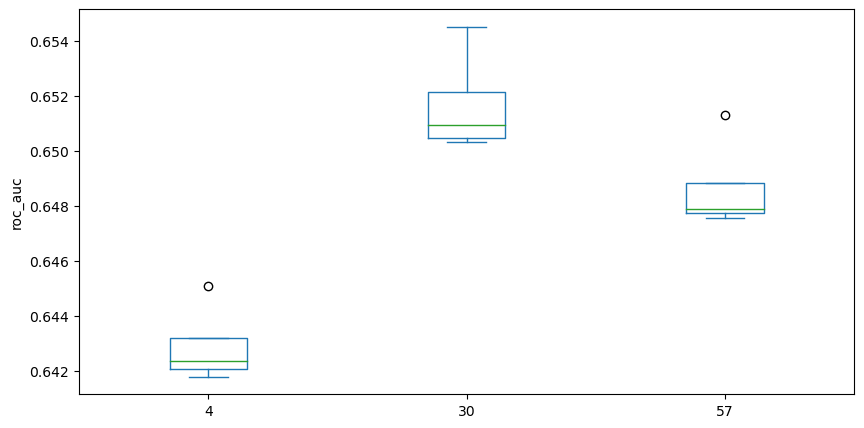

In [518]:
df_best_roc= df_best.query('rank_test_roc_auc ==1')[split_test_roc_auc_score_columns]
df_best_roc.T.plot(kind = 'box', figsize = (10, 5))
plt.ylabel("roc_auc")
plt.show()

Hemos visualizado la distribucion de las metricas a de los mejores tests a lo largo de sus 4 splits en la cross validation y confirmamos que nos quedamos con el XGBoost. Pese a tener mayor recall medio el Random Forest o mayor ROC-AUC el Gradient boosting, en computo global me parece que el XGBoost varia menos y tiene datos mas robustos ante diferentes cambios teniendo un recall bastante alto y el ROC-AUC no muy distinto del Gradient Boosting.

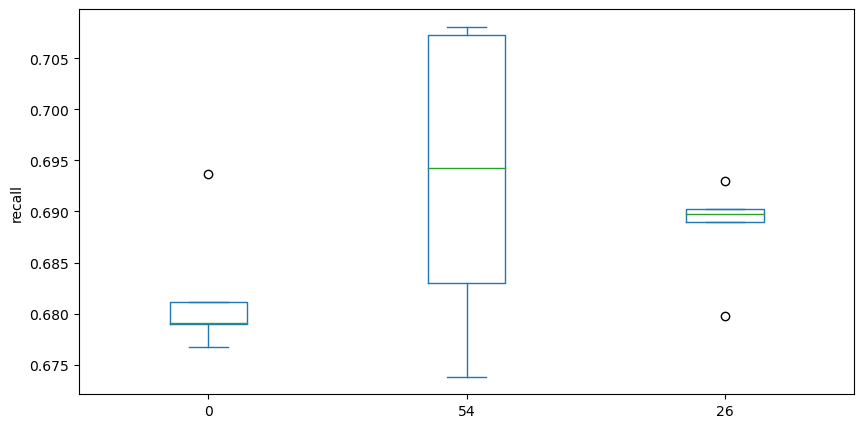

In [519]:
df_best_recall= df_best.query('rank_test_recall ==1')[split_test_recall_score_columns]
df_best_recall.T.plot(kind = 'box', figsize = (10, 5))
plt.ylabel("recall")
plt.show()

In [520]:
# filtramos el modelo que hemos elegido en el diccionario de best stimators que creamos antes para la seleccion de mejor modelo.
best_model = best_estimators['XGBoost']
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=12, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [521]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [522]:
# Obtenemos su rendimiento (ROC AUC) sobre los datos de test 
y_prob = best_model.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_pred)

0.6159444897757917

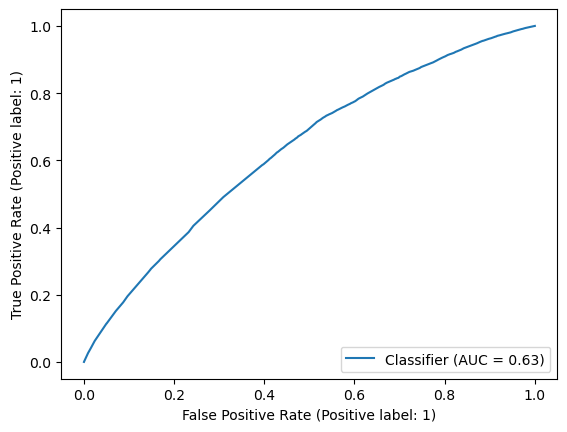

In [523]:
# Vemos la curva ROC asociada
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.show()

Tenemos un modelo que clasifica con una tasa de acierto de 62% (62 veces de cada 100 acierta).

<a id='seccion7'></a>
## 7. Third Iteration: Utilizar XGBoost Optimizado segun hiperparametros ampliando mas datos (20 columnas + target)


In [524]:
XGB_col_imp

# hemos seleccionado las columas de mayor importancia para el XGBoost y almacenadas en la variable XGB_col_imp. Esto se hizo en el apartado de feature importance si quieres consultar.

['AVProductsInstalled',
 'Census_IsVirtualDevice',
 'Census_OSSkuName_CORE_COUNTRYSPECIFIC',
 'EngineVersion_1.1.15000.2',
 'Census_PowerPlatformRoleName_SOHOServer',
 'Census_OSInstallTypeName_Other',
 'Census_TotalPhysicalRAM',
 'Census_OSEdition_CoreCountrySpecific',
 'EngineVersion_1.1.14600.4',
 'EngineVersion_1.1.15100.1',
 'IsProtected',
 'Census_OSVersion_10.0.17134.285',
 'Census_ActivationChannel_Retail',
 'AVProductStatesIdentifier',
 'Census_OSVersion_10.0.17134.165',
 'AppVersion_4.18.1806.18062',
 'EngineVersion_1.1.14901.4',
 'Wdft_IsGamer',
 'AppVersion_4.18.1807.18075',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Census_PrimaryDiskTotalCapacity',
 'AppVersion_4.13.17134.1']

In [525]:
XGB_col_imp_3= ['AVProductsInstalled',
 'Census_IsVirtualDevice',
 'Census_OSSkuName',
 'EngineVersion',
 'Census_PowerPlatformRoleName',
 'Census_OSInstallTypeName',
 'Census_TotalPhysicalRAM',
 'Census_OSEdition',
 'EngineVersion',
 'EngineVersion',
 'IsProtected',
 'Census_OSVersion',
 'Census_ActivationChannel',
 'AVProductStatesIdentifier',
 'Census_OSVersion',
 'AppVersion',
 'EngineVersion',
 'Wdft_IsGamer',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Census_PrimaryDiskTotalCapacity']
XGB_col_imp_3.append('HasDetections')

<a id='seccion5'></a>
### Preprocesamiento como siempre

In [526]:
df_3=pd.read_csv('sample_mmp.csv',encoding='UTF-8',sep=',',index_col=0).reset_index(drop=True)
df_3.Census_PrimaryDiskTotalCapacity = df_3.Census_PrimaryDiskTotalCapacity.astype(float)
df_3.SMode= df_3.SMode.astype(float)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7988\1740234191.py:1: DtypeWarning:

Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.



In [527]:
df_3[XGB_col_imp_3]

,AVProductsInstalled,Census_IsVirtualDevice,Census_OSSkuName,EngineVersion,Census_PowerPlatformRoleName,Census_OSInstallTypeName,Census_TotalPhysicalRAM,Census_OSEdition,EngineVersion,EngineVersion,...,Census_OSVersion,Census_ActivationChannel,AVProductStatesIdentifier,Census_OSVersion,AppVersion,EngineVersion,Wdft_IsGamer,Census_IsAlwaysOnAlwaysConnectedCapable,Census_PrimaryDiskTotalCapacity,HasDetections
0,1.0000,0.0000,PROFESSIONAL,1.1.15100.1,Desktop,UUPUpgrade,8192.0000,Professional,1.1.15100.1,1.1.15100.1,...,10.0.17134.165,OEM:DM,53447.0000,10.0.17134.165,4.18.1807.18075,1.1.15100.1,0.0000,0.0000,953869.0000,1
1,1.0000,0.0000,PROFESSIONAL,1.1.15100.1,Mobile,UUPUpgrade,8192.0000,Professional,1.1.15100.1,1.1.15100.1,...,10.0.17134.165,OEM:DM,53447.0000,10.0.17134.165,4.18.1807.18075,1.1.15100.1,1.0000,0.0000,476940.0000,0
2,2.0000,0.0000,CORE,1.1.15100.1,Mobile,Update,8192.0000,Core,1.1.15100.1,1.1.15100.1,...,10.0.10586.1176,Retail,46781.0000,10.0.10586.1176,4.9.10586.1106,1.1.15100.1,0.0000,0.0000,244198.0000,0
3,1.0000,0.0000,CORE,1.1.15200.1,Mobile,IBSClean,8192.0000,Core,1.1.15200.1,1.1.15200.1,...,10.0.17134.286,Retail,53447.0000,10.0.17134.286,4.18.1807.18075,1.1.15200.1,0.0000,0.0000,228936.0000,1
4,2.0000,0.0000,PROFESSIONAL,1.1.15200.1,Mobile,Update,4096.0000,Professional,1.1.15200.1,1.1.15200.1,...,10.0.17134.228,OEM:DM,47238.0000,10.0.17134.228,4.18.1807.18075,1.1.15200.1,1.0000,0.0000,476940.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.0000,0.0000,CORE,1.1.15200.1,Mobile,Upgrade,4096.0000,Core,1.1.15200.1,1.1.15200.1,...,10.0.16299.492,OEM:DM,53447.0000,10.0.16299.492,4.18.1807.18075,1.1.15200.1,1.0000,0.0000,476940.0000,0
499996,1.0000,0.0000,CORE,1.1.15100.1,Mobile,Upgrade,8192.0000,Core,1.1.15100.1,1.1.15100.1,...,10.0.16299.309,Retail,53447.0000,10.0.16299.309,4.18.1807.18075,1.1.15100.1,0.0000,0.0000,115712.0000,0
499997,1.0000,0.0000,PROFESSIONAL,1.1.15300.5,Desktop,Upgrade,4096.0000,Professional,1.1.15300.5,1.1.15300.5,...,10.0.17134.285,Retail,53447.0000,10.0.17134.285,4.13.17134.112,1.1.15300.5,0.0000,0.0000,476940.0000,0
499998,2.0000,0.0000,PROFESSIONAL,1.1.15100.1,Mobile,Upgrade,6144.0000,Professional,1.1.15100.1,1.1.15100.1,...,10.0.16299.371,Retail,43856.0000,10.0.16299.371,4.14.17639.18041,1.1.15100.1,0.0000,0.0000,715404.0000,0


In [528]:
for i in df_3.columns:
    if df_3[i].isna().sum() != 0:
        # Verificar si todos los valores únicos son numéricos, devolverá false si existe alguno no numerico(lo transforma en NaN y luego en serie booleana al pasar el notna().Al pasar el all devuelve si al menos es NaN..>no es numerica esa columna)
        if pd.to_numeric(df_3[i], errors='coerce').notna().all():
            # Para datos binarios aplicamos la moda
            if df_3[i].max() == 1 and df_3[i].min() == 0:
                df_3[i].fillna(value=-1, inplace=True)
        
        # Para datos string aplicamos palabra ''UNKNOWN'
        elif df_3[i].dtype == 'O':  # 'O' representa datos de tipo string en pandas
            df_3[i].fillna('UNKNOWN', inplace=True)

        # Para datos numéricos continuos aplicamos la mediana.
        else:
            df_3[i].fillna(value=-1, inplace=True)


df_3.isna().sum()

MachineIdentifier                          0
ProductName                                0
EngineVersion                              0
AppVersion                                 0
AvSigVersion                               0
                                          ..
Census_IsPenCapable                        0
Census_IsAlwaysOnAlwaysConnectedCapable    0
Wdft_IsGamer                               0
Wdft_RegionIdentifier                      0
HasDetections                              0
Length: 83, dtype: int64

In [529]:
# generamos la df de columnas cat 
df_3_cat= df_3.select_dtypes(include=object)

# y las columnas numericas
df_3_num= df_3.select_dtypes(include='number')

In [530]:
# Encoding
from sklearn.preprocessing import OneHotEncoder


# (sparse=False) en caso de querer matriz densa(guarda 0s). El valor por defecto (True) se recomienda cuando los datos son muy grandes.
encoder = OneHotEncoder(sparse= False ,max_categories=6)

# Ajustar y transformar las columnas categóricas
df_3_cat_encoded = encoder.fit_transform(df_3_cat)

# Crear un DataFrame con las columnas categóricas codificadas
df_3_cat_encoded = pd.DataFrame(df_3_cat_encoded, columns=encoder.get_feature_names_out(df_3_cat.columns))

# Concatenar el DataFrame con columnas numéricas (df_num) y el DataFrame codificado
df_3_encoded = pd.concat([df_3_num, df_3_cat_encoded], axis=1)

# Mostrar el DataFrame original y el DataFrame después de la codificación
df_3_encoded

# hemos pasado de 146 columnas de antes a 209 columnas...esperaba un aumento mayor de la dimensionalidad (hemos pasado de 8(iteracion 1 y 2) a 22 columnas del df)

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_ActivationChannel_Retail,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_ActivationChannel_infrequent_sklearn,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIS,Census_FlightRing_infrequent_sklearn
0,0,7.0000,0,-1.0000,53447.0000,1.0000,1.0000,1,8,85219.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
1,0,7.0000,0,-1.0000,53447.0000,1.0000,1.0000,1,129,54198.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
2,0,7.0000,0,-1.0000,46781.0000,2.0000,1.0000,1,149,122689.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
3,0,7.0000,0,-1.0000,53447.0000,1.0000,1.0000,1,164,114587.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
4,0,7.0000,0,-1.0000,47238.0000,2.0000,1.0000,1,207,72421.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,7.0000,0,-1.0000,53447.0000,1.0000,1.0000,1,85,129210.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
499996,0,7.0000,0,-1.0000,53447.0000,1.0000,1.0000,1,149,80920.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
499997,0,7.0000,0,-1.0000,53447.0000,1.0000,1.0000,1,93,4342.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
499998,0,7.0000,0,-1.0000,43856.0000,2.0000,1.0000,1,195,10222.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000


In [531]:
# dividimos train test
from sklearn.model_selection import train_test_split

X= df_3_encoded.drop(columns='HasDetections')
y=df_3_encoded['HasDetections']

# vamos a utilizar Random-hold-out como estrategia de validacion ya que tenemos un tamaño de dato suficientemente grande: partición en train/test con un porcentaje de test del 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 123)

In [532]:
#Entrenamos el modelo que hemos creado con los nuevos datos.

# Instanciación del modelo
clf_3 = best_model 

# Entrenamiento del modelo
clf_3.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=12, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [533]:
# hacemos la validacion cruzada del modelo para aumentar robustez. Añadimos las metricas que me interesa visualizar (importante recall y ROC-AUC y el resto por contrastar y curiosidad)

from sklearn.model_selection import RepeatedKFold, cross_validate

cv = RepeatedKFold(
    n_splits=5, # Número de particiones de CV 
    n_repeats=5 # Númro de repeticiones de CV
)

cv_results = cross_validate(
    clf_3,
    X,
    y,
    cv = cv, # Objeto CV definido arriba
    scoring = ['recall', 'accuracy','f1','roc_auc'],
    n_jobs = -1,
)

cv_results

c:\Users\Usuario\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



{'fit_time': array([102.7288599 , 116.34651637,  84.60010076,  75.27197814,
        117.54254913,  72.83053493,  85.96792102,  85.52932501,
         59.54933167,  59.30091286,  48.25343633,  48.46265507,
         48.45433378,  42.85267639,  36.88856983,  39.57508564,
         29.90998459,  34.97161055,  43.02183962,  42.14910674,
         37.77882934,  36.85692453,  36.43800879,  35.81922626,
         31.05670857]),
 'score_time': array([5.9804697 , 4.22750258, 7.37332678, 3.66101909, 4.59343696,
        3.95381618, 3.76756573, 3.04963422, 1.49914908, 1.50874996,
        1.94515681, 1.92533588, 2.25607991, 2.16222906, 2.41825604,
        1.72412705, 3.25341964, 4.0936563 , 2.35092258, 2.20469809,
        2.19087315, 1.61490488, 1.59976983, 1.36791253, 0.90489769]),
 'test_recall': array([0.60704992, 0.61666734, 0.62294951, 0.56428144, 0.61500509,
        0.62268745, 0.60383393, 0.64484629, 0.62320493, 0.6236239 ,
        0.62126877, 0.62066888, 0.62177023, 0.60870606, 0.60170988,
     

In [534]:
# Crear un DataFrame con los resultados de la validación cruzada
cv_results_df = pd.DataFrame({
    'Test': range(1, cv_results['test_recall'].shape[0] + 1),
    'Recall': cv_results['test_recall'],
    'Accuracy': cv_results['test_accuracy'],
    'F1 Score': cv_results['test_f1'],
    'ROC AUC': cv_results['test_roc_auc']
})

# Mostrar el DataFrame

cv_results_df
tabla_metricas_XGB_3 = pd.DataFrame(columns = ['Metrica', 'Media', 'Std_devit'])

In [535]:
tabla_metricas_XGB_3 = pd.DataFrame(columns = ['Metrica', 'Media', 'Std_devit'])
for i in cv_results_df.columns:
    if i=='Test':
        pass
    else:    
        tabla_metricas_XGB_3.loc[len(tabla_metricas_XGB_3)] = [i, 
                                                       np.round(np.mean(cv_results_df[i]), 4),
                                                       np.round(np.std(cv_results_df[i]), 4)]

### 6.2 Tabla metricas XGBoost Optimizado

In [536]:
tabla_metricas_XGB_3

,Metrica,Media,Std_devit
0,Recall,0.6159,0.0140
1,Accuracy,0.6207,0.0014
2,F1 Score,0.6188,0.0055
3,ROC AUC,0.6740,0.0016


Vemos que respecto a nuestro primer modelo XGBoost las metricas han cambiado. Tenemos una mejora de Recall significativa (+0.03 respecto a Iteracion 2 y de +0.05 respecto baseline) 

Sin embargo aumenta los valores generales de las varianzas y consecuentemente las desviaciones estandar del CV del  modelo. Esto lo achaco  a la introduccion de mas columnas a analizar (de 8 a 21).

In [537]:
tabla_metricas_XGB

,Metrica,Media,Std_devit
0,Recall,0.6755,0.0026
1,Accuracy,0.6101,0.0012
2,F1 Score,0.6340,0.0017
3,ROC AUC,0.6503,0.0011


In [538]:
tabla_metricas_baseline


,Modelo,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Random Forest,0.6170,0.6200,0.6090,0.6150,0.6170
1,Gradient_Boosting,0.6150,0.6050,0.6690,0.6350,0.6150
2,XGBoost,0.6310,0.6250,0.6560,0.6400,0.6310
3,Logisitc_Regression,0.5010,0.5010,0.9940,0.6660,0.5000


In [539]:
# vamos a visualizar el rendimiento de dicho modelo.
# Obtenemos su rendimiento (ROC AUC) sobre los datos de test 
y_prob = best_model.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_pred)

0.6159444897757917

### 6.3 Curva ROC-AUC

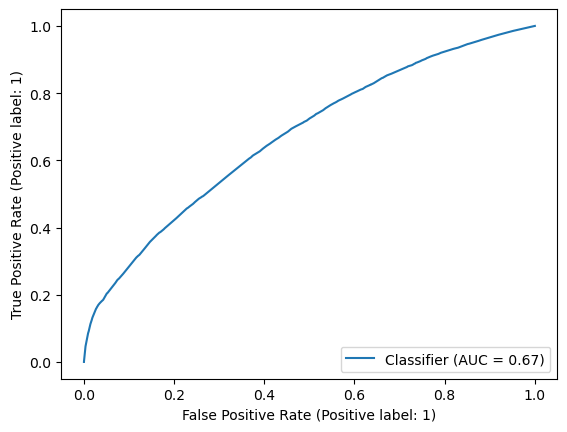

In [540]:
# Vemos la curva ROC asociada
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.show()

La grafica curva ROC-AUC me esperaba que mejorara mas. Sin embargo algo ha mejorado tanto en forma como en puntuacion respecto a la primera curva roc que vimos.

# Conclusion

Hemos conseguido mejorar el modelo!

(lo creas o no Fran, para mi esto es todo un éxito jajaj)

Tanto las metricas han mejorado respecto al baseline (Recall:0.6560 vs 0.7055) como el rendimiento visualizado en la curva ROC-AUC (AUC: 0.62 vs 0.65).

Me gustaría seguir optimizando el modelo pero por la falta de tiempo para la entrega me veo incapaz. 

Las cosas que me gustaría seguir investigando son las siguientes:
1. Investigar las columnas de nulos de alta proporcion de nulos que eliminamos al principio (el punto de corte lo pusimos en >30000 nulos, más de un 6% de nulos en columna). Se me ocurre aislar los datos sin nulos e ir probando si mejora el modelo usando dichos datos o ir modificando dicho punto de corte. La pregunta que me hago es: ¿y si en esas columnas existian las claves para que el modelo clasifique mejor?
2. Probar otros modelos no basados en arboles. Inicialmente valoré esta opcion pero dado el alto tiempo de procesado aborté esta alternativa.
3. Hacer distintos cortes de las categorias maximas en el OHE.
4. Utilizar Binary encoder para las variables categoricas que tengan mas representacion vs ''otros''
5. Buscar nuevas formas de analizar la correlacion de las variables con la variable target. La funcion corr() usa la correlacion de Pearson que cuantifica las correlaciones lineales pero el resto no (relaciones exponenciles, ausencia de analisis de correlacion de variables categoricas...). La biblioteca PhiK seria un aspecto que me gustaria probar e implementar con el objetivo de tener mayor insigth sobre la importancia de las variables. De esta forma al modelo podria pasarle dichas columnas con la esperanza de que mejore el performance.(riesgo de overfiting por aumento de complejidad?)
6.  Codigo mas sencillo. Soy consciente que hay bastantes ñapas de programacion (sobretodo cortapega de codigo), y me hubiera gustado tomarme el tiempo para pensar y construir funciones para automatizar los procesos.

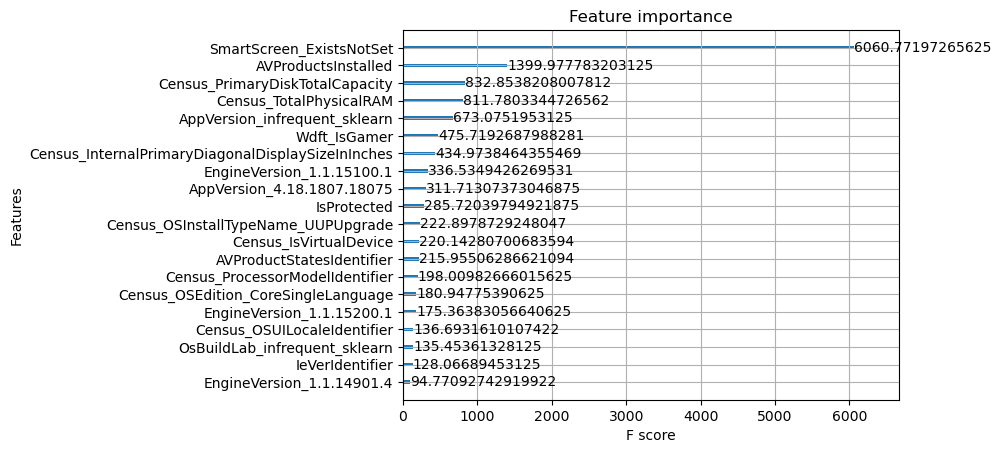

In [541]:
from xgboost import plot_importance

# Criterio de importancia: ganancia de información, AQUI PUEDES PONER DISTINTOS VALORES, gain, weigth, cover...
plot_importance(best_model, importance_type = 'gain', max_num_features=20)
plt.show()

Aqui podemos ver las Features importances de nuestro mejor modelo. Al parecer que tenga o no pantalla el ordenador es muy importante y tiene sentido ya que probablemente si no tiene pantalla se trate de algun ordenador de servidores.

Me gustaría dedicarle algo mas de cariño a la interpretacion del modelo y de las variables...pero esto exhausto. Hasta aqui llego.

Ha sido un placer Fran. He aprendido mucho en tu modulo. He valorado mucho lo organizado que eres dando las clases.

Alejandro

FEEDBACK FRAN

Enhorabuena Alejandro, se puede apreciar perfectamente el esfuerzo que le has dedicado. Me encanta el enfoque que has seguido, justo lo que no me cansé de explicar en clase: poquito a poquito, iteración a iteración, intentando mejorar el rendimiento de un modelo baseline. Está todo muy bien documentado y justificado. Aún así, para ser perfecto, le faltan algunas cosillas:

- Tú mismo lo dices al final, pero al notebook no le vendría mal una (o dos) capas de limpieza. Se nota que de tanto probar cosas se te ha acabado el tiempo para simplificarlo y dejarlo más "bonito". He de reconocer que en ocasiones me ha costado seguirlo.
- ¡No hay nada de EDA! Ni univariante, ni bivariante... 
- En la eliminación de variables con muchos nulos, eliminas aquellas con más de 30.000 nulos. Teniendo en cuenta que tienes 500.000 observaciones, eso es un 6%... es un umbral muy bajo, y estás eliminando muchas variables que podrían ser útiles. Consejo: los umbrales en términos relativos, casi siempre.